<a name = "inicio"></a>

***

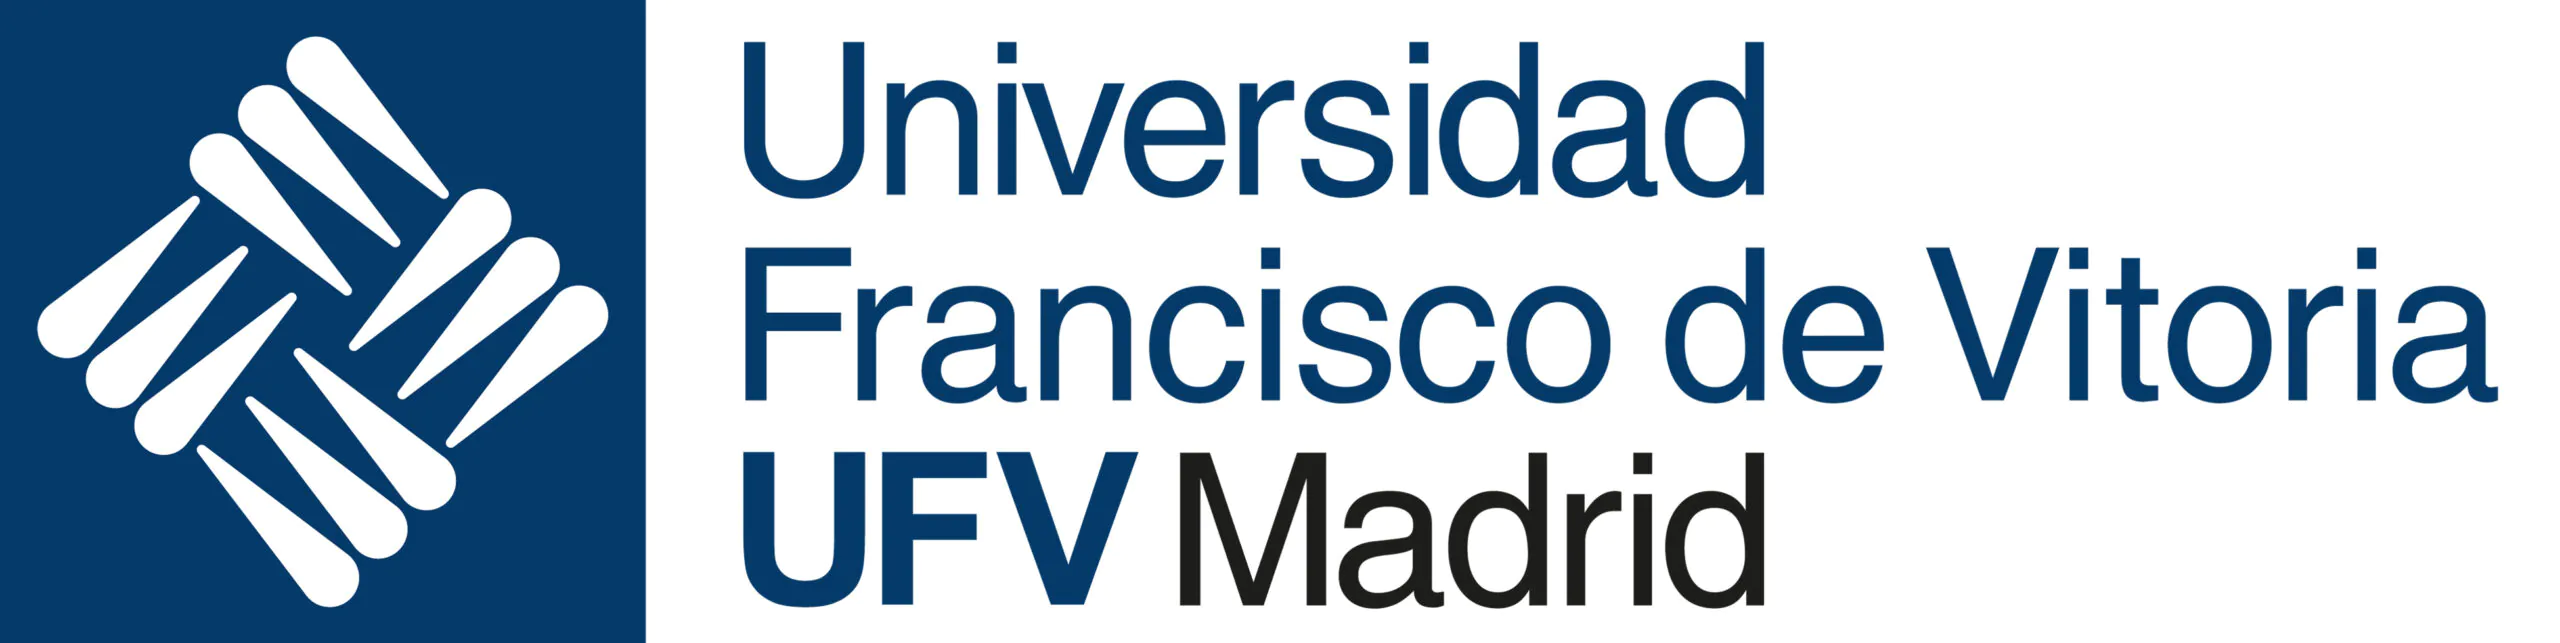

***

**<mark>Nota.-**<mark><div style="background-color:#F7DC6F"><b>Tened en cuenta que las soluciones que aparecen recogidas en este notebook no muestran (en su totalidad) la respuesta que ustedes tendréis que dar en vuestras resoluciones. Simplemente se aportan los resultados principales de cada uno de los ejercicios propuestos para que podáis utilizarlos como referencias a la hora de autoevaluaros. Recordar que tenéis que completar cada uno de ellos incluyendo comentarios acerca de los resultados obtenidos describiendo con detalle cada una de las celdas tipo código paso a paso lo que estáis haciendo. </b></div>

***

### Ejercicio 1

El dataframe `Boston` de la librería $\tt MASS$ contiene información de propiedades inmobiliarias de la ciudad de Boston. Cada propiedad está caracterizada por $13$ variables que indican las características de la misma, así como por la variable `medv` que representa una estimación del valor de la propiedad en miles de dólares. Considerando la variable dependiente `medv` estimar un modelo de regresión lineal múltiple para las siguientes variables independientes: `crim` que representa la tasa de crimen per capita de los distritos a los que pertenece cada una de las viviendas, la variable `dis` que representa la distancia ponderada a cinco centros de empleo de Boston y la variable `rm` que representa el número medio de habitaciones por vivienda. Realizar los siguientes apartados:

1. Exploración inicial de la base de datos 
2. Análisis de la existencia de relación lineal entre las variables seleccionadas
3. Estimación de un modelo de regresión lineal múltiple entre las variables seleccionadas
4. Interpretación de las salidas de estimación del modelo de regresión lineal múltiple obtenido

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 01</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Exploración inicial de la base de datos</b></div>

Vamos a utilizar el conjunto de datos `Boston` de la libería $\tt MASS$ que contiene información de propiedades inmobiliarias de la ciudad de Boston. Estamos interesados en explicar el valor de las propiedades (en miles de dólares) a partir de las siguientes variables: la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas, la distancia ponderada a cinco centros de empleo de Boston y el número medio de habitaciones por vivienda. En este caso, nuestra variable dependiente será `medv` y las variables independientes serán `crim`, `dis` y `rm`. 

In [1]:
# Instalamos la librería
install.packages("MASS")

Warning message:
“package ‘MASS’ is not available for this version of R
‘MASS’ version 7.3-61 is in the repositories but depends on R (>= 4.4.0)
‘MASS’ version 7.3-61 is in the repositories but depends on R (>= 4.5)

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
# Cargamos la librería 
library(MASS)

In [3]:
# Cargamos la base de datos que nos interesa
data(Boston)

In [4]:
# Estructura de la base de datos 'Boston'
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
# Clases de la base de datos 'Boston'
class(Boston)

[1] "data.frame"

In [6]:
# Dimensiones de la base de datos 'Boston'
dim(Boston)

[1] 506  14

In [7]:
# Variables de la base de datos 'Boston'
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [8]:
# Seleccionamos las 4 variables que nos interesan
zdata = Boston[, c("medv", "crim", "dis", "rm")]

In [9]:
# Visualizamos la base de datos seleccionada
head(zdata)

,medv,crim,dis,rm
,<dbl>,<dbl>,<dbl>,<dbl>
1,24.0,0.00632,4.0900,6.575
2,21.6,0.02731,4.9671,6.421
3,34.7,0.02729,4.9671,7.185
4,33.4,0.03237,6.0622,6.998
5,36.2,0.06905,6.0622,7.147
6,28.7,0.02985,6.0622,6.430


In [10]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(zdata)

In [11]:
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 506

[1] 506

In [12]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD zdata o wdata indistintamente)
head(wdata)

,medv,crim,dis,rm
,<dbl>,<dbl>,<dbl>,<dbl>
1,24.0,0.00632,4.0900,6.575
2,21.6,0.02731,4.9671,6.421
3,34.7,0.02729,4.9671,7.185
4,33.4,0.03237,6.0622,6.998
5,36.2,0.06905,6.0622,7.147
6,28.7,0.02985,6.0622,6.430


In [13]:
# Realizamos el análisis exploratorio de las variables utilizadas 
summary(wdata)

      medv            crim               dis               rm       
 Min.   : 5.00   Min.   : 0.00632   Min.   : 1.130   Min.   :3.561  
 1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.: 2.100   1st Qu.:5.886  
 Median :21.20   Median : 0.25651   Median : 3.207   Median :6.208  
 Mean   :22.53   Mean   : 3.61352   Mean   : 3.795   Mean   :6.285  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.: 5.188   3rd Qu.:6.623  
 Max.   :50.00   Max.   :88.97620   Max.   :12.127   Max.   :8.780  

<div style="background-color:#0BF7CC"><b> Nota.- Como siempre os digo, tenéis que incluir un análisis más detallado de todos los estadísticos descriptivos e interpretar los resultados obtenidos tal y como se ha comentado en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 2. Análisis de la existencia de relación lineal entre las variables</b></div>

Antes de realizar ningún tipo de modelización tenéis que aseguraros que podemos aplicar un modelo de regresión entre las variables consideradas. Para ello, tiene que existir una relación entre las mismas. En caso contrario NO podremos realizar ningún tipo de análisis de regresión utilizando dichas vraiables.

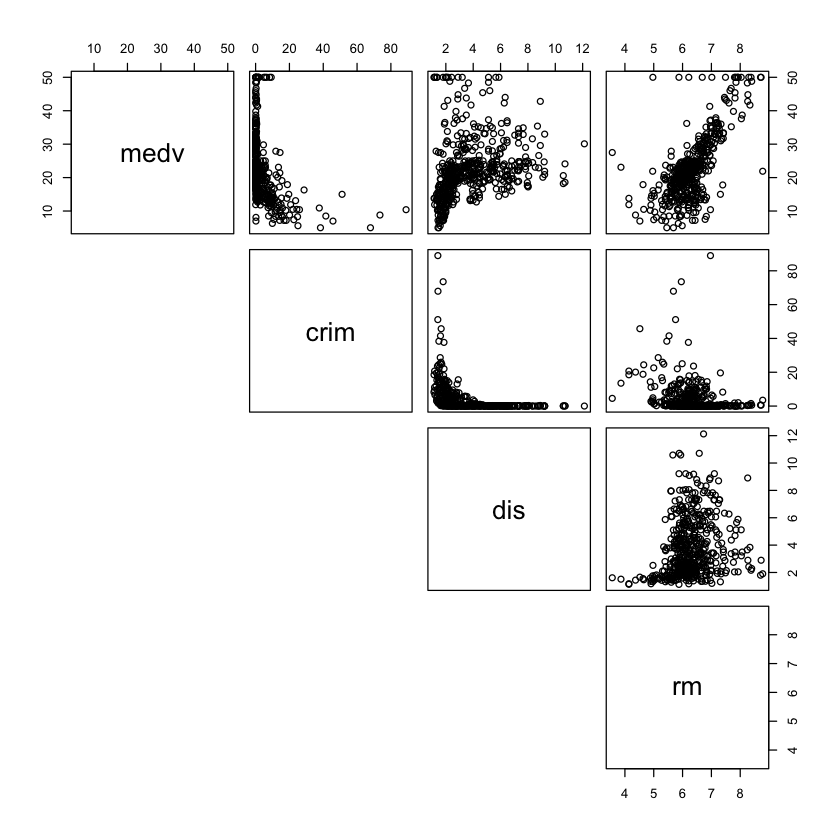

In [14]:
# Evidencia gráfica a través del gráfico de dispersión 
pairs(wdata, lower.panel = NULL)

**<u>Interpretación resultados</u>.-** Podemos observar en los gráficos de dispersión que no existe un patrón puramente aleatorio, es decir, que no nos aparece todo el cuadrado lleno de puntos colocados de manera aleatoria. Luego, este hecho, es una evidencia de que podría existir una relación entre las variables. Entre las variables independientes, parece que la variable `rm` es la que presenta un patrón más claro en relación a la variable dependiente `medv`. Como siempre, tenemos que confirmarlo con las evidencias numéricas y contrastadas.

In [15]:
# Evidencia numérica
cor(wdata)

,medv,crim,dis,rm
medv,1.0000000,-0.3883046,0.2499287,0.6953599
crim,-0.3883046,1.0000000,-0.3796701,-0.2192467
dis,0.2499287,-0.3796701,1.0000000,0.2052462
rm,0.6953599,-0.2192467,0.2052462,1.0000000


**<u>Interpretación resultados</u>.-** En este caso, para obtener las evidencias numéricas tendremos que calcular el coeficiente de correlación. En particular, realizaremos un análisis de la correlación lineal entre la variable dependiente y cada una de las variables explicativas obteniendo la matriz de correlaciones. Observamos que en todos los casos el coeficiente de correlación estimado entre las variables independientes y la variable dependiente es distinto de $0$, con lo cual sería una evidencia de que las variables sí están relacionadas. Sin embargo, hasta que no realicemos el contraste de correlación no sabremos si está bien calculado dicho coeficiente y podemos tomarlo como válido. Efectivamente, todo parece indicar, tal y como se avanzó en el gráfico anterior que el coeficiente más elevado sería entre las variables `rm` y `medv`. Vamos a contrastarlo.

In [16]:
# Evidencia contrastada (variable crim)
cor.test(wdata$medv, wdata$crim)


	Pearson's product-moment correlation

data:  wdata$medv and wdata$crim
t = -9.4597, df = 504, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4599064 -0.3116859
sample estimates:
       cor 
-0.3883046 


In [17]:
# Evidencia contrastada (variable dis)
cor.test(wdata$medv, wdata$dis)


	Pearson's product-moment correlation

data:  wdata$medv and wdata$dis
t = 5.7948, df = 504, p-value = 1.207e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1663849 0.3299100
sample estimates:
      cor 
0.2499287 


In [18]:
# Evidencia contrastada (variable rm)
cor.test(wdata$medv, wdata$rm)


	Pearson's product-moment correlation

data:  wdata$medv and wdata$rm
t = 21.722, df = 504, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6474346 0.7378075
sample estimates:
      cor 
0.6953599 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido en los tres casos es muy pequeño siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, el nivel de precios de las viviendas SI está correlacionado con la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas, la distancia ponderada a cinco centros de empleo de Boston y el número medio de habitaciones por vivienda. De hecho, podemos destacar que la relación de la variable `medv` es directa con las variables `dis` y `rm` e inversa con la variable `crim`. Es decir, a mayor tasa de criminalidad en el barrio, menor será el precio de la vivieneda. Por tanto, SI podemos realizar la estimación de un modelo de regresión lineal entre dichas variables. En el caso de que alguna de ellas no estuviera relacionada con la variable dependiente tendríamos que eliminarla de nuestro estudio.

<div style="background-color:#5DADE2"><b>Apartado 3: Estimación de un modelo de regresión lineal múltiple entre las variables</b></div>

El Modelo de Regresión Lineal Múltiple (MRLM) que tenemos que estimar utilizando las funciones de R sería el siguiente: 

\begin{align*}
medv_{i}&=\beta_{0}+\beta_{1}*crim_{i}+\beta_{2}*dis_{i}+\beta_{3}*rm_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [19]:
# Estimación del modelo de regresión lineal múltiple incluyendo el dataset como parámetro
modelo = lm(medv ~ crim + dis + rm, data = wdata)  
modelo


Call:
lm(formula = medv ~ crim + dis + rm, data = wdata)

Coefficients:
(Intercept)         crim          dis           rm  
   -29.4584      -0.2540       0.1263       8.3426  


**<u>Interpretación resultados</u>.-** Los coeficientes del modelo de regresión lineal estimado son $\beta_0 = -29.4584$, $\beta_1 = -0.2540$, $\beta_2 = 0.1263$ y $\beta_3 = 8.3426$. La interpretación de los parámetros $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$ en un modelo de regresión lineal múltiple donde la variable dependiente es el precio de las viviendas y las variables independientes son la tasa de crimen per capita de los distritos a los que petenece cada una de las viviendas, la distancia ponderada a cinco centros de empleo de Boston y el número medio de habitaciones por vivienda es fundamental para comprender la relación entre dichas variables. En este caso, $\beta_0=-29.4584$ representa el valor de la intersección con el eje y, lo que implica el precio medio de todas las viviendas consideradas (en miles de dólares) cuando las tres variables independientes son cero. Podemos decir, que en este caso, al obtener un valor negativo no podemos deducir una interpretación de dicho coeficiente ya que no tiene sentido un valor negativo de una vivienda. 

Por otro lado, $\beta_1=-0.2540$ es el coeficiente de la pendiente de la variable `crim` y muestra cómo cambia el nivel de precios de la vivienda en función de la tasa de criminalidad. Específicamente, indica que por cada grado adicional que se aumente en la tasa de criminalidad, se espera una disminución de un $25\%$ en el nivel de precios de las viviendas. Este coeficiente negativo sugiere una relación inversa y proporcional entre ambas variables, donde un mayor nivel de criminalidad se asocia con precios menores de las viviendas de dichos barrios. Con respecto a $\beta_2=-0.1263$ es el coeficiente de la pendiente de la variable `dis`y muestra cómo cambia el nivel de precios de la vivienda en relación a la distancia ponderada a cinco centros de empleo de Boston. En este caso, nos indica que por cada unidad adicional (expresada en metros/kms) que se aumente en la distancia entre las viviendas y esos centros de empleo, se espera un aumento de un $12\%$ en el nivel de precios de las viviendas. Luego, parece que el hecho de estar más o menos cerca de un centro de empleo tenga un impacto positivo en el precio de las viviendas analizadas. Por último, $\beta_3=8.3426$ es el coeficiente de la pendiente de la variable `rm`y muestra cómo cambia el nivel de precios de la vivienda en relación al número medio de habitaciones por vivienda. En particular, nos indica que por cada habitación extra en las viviendas consideradas, se espera un aumento de un $8$ veces ($800\%$) en el nivel de precios de las viviendas. Luego, tiene un gran impacto el número de habitaciones en el precio final de las viviendas analizadas.

In [20]:
# Información de salida del modelo de regresión estimado
str(modelo)

List of 12
 $ coefficients : Named num [1:4] -29.458 -0.254 0.126 8.343
  ..- attr(*, "names")= chr [1:4] "(Intercept)" "crim" "dis" "rm"
 $ residuals    : Named num [1:506] -1.91 -3.13 3.6 3.72 5.29 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ effects      : Named num [1:506] -506.9 -80.3 -22.9 -127.3 5.1 ...
  ..- attr(*, "names")= chr [1:506] "(Intercept)" "crim" "dis" "rm" ...
 $ rank         : int 4
 $ fitted.values: Named num [1:506] 25.9 24.7 31.1 29.7 30.9 ...
  ..- attr(*, "names")= chr [1:506] "1" "2" "3" "4" ...
 $ assign       : int [1:4] 0 1 2 3
 $ qr           :List of 5
  ..$ qr   : num [1:506, 1:4] -22.4944 0.0445 0.0445 0.0445 0.0445 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:506] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:4] "(Intercept)" "crim" "dis" "rm"
  .. ..- attr(*, "assign")= int [1:4] 0 1 2 3
  ..$ qraux: num [1:4] 1.04 1.02 1.02 1.03
  ..$ pivot: int [1:4] 1 2 3 4
  ..$ tol  : num 1e-07
  ..$ rank : int 4
  ..- attr(*, "c

<div style="background-color:#5DADE2"><b>Apartado 4: Interpretación de las salidas de estimación de un modelo de regresión lineal múltiple</b></div>

Las principales funciones que se aplican sobre un objeto`lm` (obtenido tras realizar la estimación oportuna del modelo de regresión lineal):

1. ¿Cómo extraer el output de la regresión? Tenéis que utilizar la función **`summary()`**. 
2. ¿Cómo extraer los coeficientes de regresión estimados? Tenéis que utilizar la función **`coef()`**. 
3. ¿Cómo extraer los valores ajustados de la variable dependiente? Tenéis que utilizar la función **`fitted()`**.
4. ¿Cómo extraet los residuos estimados? Tenéis que utilizar la función **`resid()`**.
5. ¿Cómo extraer los grados de libertad? Tenéis que utilizar la función `df.residual`.
6. ¿Cómo extraer la suma de cuadrados de los residuos? Tenéis que utilizar la función **`deviance()`**.
7. ¿Cómo extraer los errores de los coeficientes de regresión estimados? No hay función de extracción para este caso.
8. ¿Cómo extraer los coeficientes de determinación? No hay función de extracción para este caso.
9. ¿Cómo extraer los intervalos de confianza para los coeficientes de regresión? Tenéis que utilizar la función **`confint()`**.
10. ¿Cómo extraer el estadístico F y su p-valor? Tenéis que utilizar la función **`anova()`**.

<div style="background-color:#0BF7CC"><b> Nota.- En este punto, como ya os comenté, tenéis que incluir una interpretación de cada uno de los resultados obtenidos en los 10 apartados. En este caso, solo mostraré los resultados para que podáis verificar si lo habéis realizado correctamente o no. Podéis utilizar como referencia para comentar cada uno de los puntos las interpretaciones incluidas en los Notebooks teóricos. </b></div>

#### 4.1 ¿Cómo extraer el output de la regresión?

In [21]:
# Aplicamos la función summary para obtener los principales resultados del modelo de regresión lineal
output = summary(modelo)
output


Call:
lm(formula = medv ~ crim + dis + rm, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.247  -2.930  -0.572   2.390  39.072 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.45838    2.60010 -11.330  < 2e-16 ***
crim         -0.25405    0.03532  -7.193 2.32e-12 ***
dis           0.12627    0.14382   0.878     0.38    
rm            8.34257    0.40870  20.413  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.238 on 502 degrees of freedom
Multiple R-squared:  0.5427,	Adjusted R-squared:  0.5399 
F-statistic: 198.6 on 3 and 502 DF,  p-value: < 2.2e-16


#### 4.2 ¿Cómo extraer los coeficientes de regresión estimados?

Vamos a <u>extraer los coeficientes de regresión</u> estimados a través de tres formas diferentes siendo todas ellas equivalentes:

* Extracción directa de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ utilizando el objeto `output`.


* Extracción de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ con la función $\tt coef$ sobre el `modelo` estimado.


* Cálculo manual de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ a partir de la siguiente ecuación formal. En el caso múltiple tenemos que proceder del siguiente modo. El estimador de MCO para los coeficientes $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ viene dado por la expresión: 

\begin{align*}
\hat \beta = {\left( {X'X} \right)^{ - 1}}X'y
\end{align*}

Para ello hemos necesitado construir la matriz de variables independientes $X=x_1, x_2, x_3$ y el vector de la variable dependiente $y$.

<div style="background-color:#0BF7CC"><b> Nota.- Ustedes, al menos, para aprobar estos apartados tendréis que incluir una de las tres o dos maneras (dependiendo del punto) aunque se valorará positivamente el hecho de que sea lo más completo posible para poder sacar la nota máxima en este tipo de ejercicios. </b></div>

In [22]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-29.4583837,2.60009607,-11.329729,1.183167e-26
crim,-0.2540454,0.03531817,-7.193049,2.317294e-12
dis,0.1262732,0.14382178,0.877984,3.803724e-01
rm,8.3425659,0.40869637,20.412626,6.998180e-68


In [23]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modelo)
bhat 

(Intercept)        crim         dis          rm 
-29.4583837  -0.2540454   0.1262732   8.3425659

In [24]:
# Cálculo manual de betas
y = wdata[, 1]
X = as.matrix(cbind(cte = 1, wdata[, 2:4]))  # Llamo a la columna de 1s, cte.
head(cbind(y, X))

,y,cte,crim,dis,rm
1,24.0,1,0.00632,4.0900,6.575
2,21.6,1,0.02731,4.9671,6.421
3,34.7,1,0.02729,4.9671,7.185
4,33.4,1,0.03237,6.0622,6.998
5,36.2,1,0.06905,6.0622,7.147
6,28.7,1,0.02985,6.0622,6.430


In [25]:
# Calculamos los coeficientes estimados utilizando las matrices obtenidas en el paso anterior
betas = solve(t(X) %*% X) %*% t(X) %*% y
betas

cte,-29.4583837
crim,-0.2540454
dis,0.1262732
rm,8.3425659


#### 4.3 ¿Cómo extraer los valores ajustados de la variable dependiente?

Vamos a extraer los valores ajustados de la variable dependiente a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los valores ajustados de nuestra variable dependiente $\hat{y}$ sobre el `modelo` estimado.


+ Extracción de los valores ajustados de nuestra variable dependiente $\hat{y}$ con la función $\tt fitted$ sobre el `modelo` estimado.


+ Cálculo manual de los valores ajustados de nuestra variable dependiente $\hat{y}$ a partir de la siguiente ecuación formal:

\begin{align*}
\hat y_i&=\hat \beta_{0}+\hat \beta_{1}x_{i,1} + \hat \beta_{2}x_{i,2} + \hat \beta_{3}x_{i,3}  
\end{align*}

In [26]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

1        2        3        4        5        6 
25.90884 24.72951 31.10323 29.68016 30.91389 24.94223

In [27]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelo)
head(yhat)

1        2        3        4        5        6 
25.90884 24.72951 31.10323 29.68016 30.91389 24.94223

In [28]:
# Cálculo manual de los valores ajustados (alternativa a)
yajustado = bhat[1]+bhat[2]*wdata$crim+bhat[3]*wdata$dis+bhat[4]*wdata$rm
head(yajustado)

[1] 25.90884 24.72951 31.10323 29.68016 30.91389 24.94223

In [29]:
# Cálculo manual de los valores ajustados (alternativa b)
yajustado1 = bhat["(Intercept)"]+bhat["crim"]*wdata$crim+bhat["dis"]*wdata$dis+bhat["rm"]*wdata$rm
head(yajustado1)

[1] 25.90884 24.72951 31.10323 29.68016 30.91389 24.94223

#### 4.4 ¿Cómo extraer los residuos estimados?

Vamos a extraer los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los residuos estimados $\hat{\epsilon}$ sobre el `modelo` estimado.


+ Extracción del valor de los residuos estimados $\hat{\epsilon}$ con la función $\tt resid$ sobre el `modelo`  estimado.


+ Cálculo manual del valor de los residuos estimados $\hat{\epsilon}$ a partir de la siguiente ecuación formal. Es decir, los resiudos se calculan como la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo $i=1,..., n$.

\begin{align*}
\hat \epsilon_i = y_i - \hat y_i 
\end{align*}

In [30]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

1         2         3         4         5         6 
-1.908839 -3.129506  3.596769  3.719837  5.286113  3.757775

In [31]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat = resid(modelo)
head(uhat)

1         2         3         4         5         6 
-1.908839 -3.129506  3.596769  3.719837  5.286113  3.757775

In [32]:
# Cálculo manual del valor de los residuos
residuos = wdata$medv-yajustado
head(residuos)

[1] -1.908839 -3.129506  3.596769  3.719837  5.286113  3.757775

In [33]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(wdata$medv,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
1,24.0,25.90884,25.90884,25.90884,-1.908839,-1.908839
2,21.6,24.72951,24.72951,24.72951,-3.129506,-3.129506
3,34.7,31.10323,31.10323,31.10323,3.596769,3.596769
4,33.4,29.68016,29.68016,29.68016,3.719837,3.719837
5,36.2,30.91389,30.91389,30.91389,5.286113,5.286113
6,28.7,24.94223,24.94223,24.94223,3.757775,3.757775


In [34]:
# Comprobamos y = y_estimado + residuos_estimados (1º observación)
25.90884-1.908839

[1] 24

#### 4.5 ¿Cómo extraer los grados de libertad?

Vamos a extraer los grados de libertad estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los grados de libertad utilizando el objeto `output`.


+ Extracción del valor de los grados de libertad con la función $\tt df.residual$ sobre el `modelo` estimado.


+ Cálculo manual del valor de los grados de libertad a partir de la siguiente ecuación formal:

$g.d.l.=n-k$ siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados.

In [35]:
# Extracción directa del valor de los grados de libertad (utilizamos output NO modelo)
head(output$df)[2]   

[1] 502

In [36]:
# Extracción del valor de los grados de libertad con la función `df.residual`
df = df.residual(modelo)
df

[1] 502

In [37]:
# Cálculo manual del valor de los grados de libertad (utilizamos output NO modelo)
gdl = nrow(wdata) - output$df[1]
gdl

[1] 502

#### 4.6 ¿Cómo extraer la suma de cuadrados de los residuos? 

Vamos a extraer la suma de cuadrados de los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el objeto `output`. Este estadístico cuantifica cuánta información de la variable dependiente se pierde con el modelo empleado (variables independientes utilizadas). Es útil cuándo lo comparamos con otros modelos.


+ Extracción del valor de la suma de cuadrados de los residuos con la función $\tt deviance$ sobre el `modelo` estimado.


+ Cálculo manual del valor de la suma de cuadrados de los residuos a partir de la siguiente ecuación formal:

\begin{align*}
SSR = \hat \sigma = \sqrt {\frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{n - k}}}
\end{align*}

In [38]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 6.238265

In [39]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/gdl)
ssr

[1] 6.238265

In [40]:
# Cálculo manual del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/gdl)
sigma

[1] 6.238265

#### 4.7 ¿Cómo extraer los errores de los parámetros estimados?

Vamos a extraer los errores de los parámetros estimados a través de dos formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})$ utilizando el objeto `output`.


+ Cálculo manual de los errores de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2},\hat{\beta}_{3})'$ a partir de la siguiente ecuación formal. Los errores estándar de los parámetros estimados (`Std. Error`) se obtienen a partir de la raíz cuadrada de la diagonal de la matriz de varianzas-covarianzas estimada. El estimador de la matriz de varianzas-covarianzas se calcula a través de la siguiente expresión y se obtiene a través de la función `vcov` directamente.

\begin{align*}
Var\left( {\hat \beta } \right) = {\hat \sigma^2}{\left( {X'X} \right)^{ - 1}}
\end{align*}

In [41]:
# Extracción directa de los errores de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-29.4583837,2.60009607,-11.329729,1.183167e-26
crim,-0.2540454,0.03531817,-7.193049,2.317294e-12
dis,0.1262732,0.14382178,0.877984,3.803724e-01
rm,8.3425659,0.40869637,20.412626,6.998180e-68


In [42]:
# Cálculo manual de los errores de los coeficientes de regresión
# Obtener la matriz de var-cov directamente
varcov = vcov(modelo)
varcov

,(Intercept),crim,dis,rm
(Intercept),6.76049957,-0.025422562,-0.035000151,-1.027728596
crim,-0.02542256,0.001247373,0.001780260,0.002252953
dis,-0.03500015,0.001780260,0.020684704,-0.007945123
rm,-1.02772860,0.002252953,-0.007945123,0.167032721


In [43]:
# Obtenemos los errores estándar de los parámetros estimados 
se = sqrt(diag(varcov))
print(se)

(Intercept)        crim         dis          rm 
 2.60009607  0.03531817  0.14382178  0.40869637 


In [44]:
# Obtenemos la matriz de var-cov paso a paso (paso 1)
y = wdata[,1]
X = as.matrix(cbind(cte=1,wdata[,2:4]))
head(cbind(y,X))

,y,cte,crim,dis,rm
1,24.0,1,0.00632,4.0900,6.575
2,21.6,1,0.02731,4.9671,6.421
3,34.7,1,0.02729,4.9671,7.185
4,33.4,1,0.03237,6.0622,6.998
5,36.2,1,0.06905,6.0622,7.147
6,28.7,1,0.02985,6.0622,6.430


In [45]:
# Obtenemos la matriz de var-cov paso a paso (paso 2)
varcov2 = sigma^2 * solve(t(X) %*% X)
varcov2

,cte,crim,dis,rm
cte,6.76049957,-0.025422562,-0.035000151,-1.027728596
crim,-0.02542256,0.001247373,0.001780260,0.002252953
dis,-0.03500015,0.001780260,0.020684704,-0.007945123
rm,-1.02772860,0.002252953,-0.007945123,0.167032721


In [46]:
# Obtenemos los errores estándar de los parámetros estimados 
se2 = sqrt(diag(varcov2))
print(se2)

       cte       crim        dis         rm 
2.60009607 0.03531817 0.14382178 0.40869637 


#### 4.8 ¿Cómo extraer los coeficientes de determinación?

Vamos a extraer los coeficientes de determinación estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los coeficientes de determinación utilizando el objeto `output`.


+ Cálculo manual del coeficiente de determinación a partir de la siguiente ecuación formal: (Opción 1)

\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores originales de la variable dependiente $y_i$ y el valor promedio de la variable $\bar y_i$.

In [47]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2 = output$r.squared
R2

[1] 0.5426614

In [48]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = wdata$medv-mean(wdata$medv)
residuos2

[1]   1.46719368  -0.93280632  12.16719368  10.86719368  13.66719368
  [6]   6.16719368   0.36719368   4.56719368  -6.03280632  -3.63280632
 [11]  -7.53280632  -3.63280632  -0.83280632  -2.13280632  -4.33280632
 [16]  -2.63280632   0.56719368  -5.03280632  -2.33280632  -4.33280632
 [21]  -8.93280632  -2.93280632  -7.33280632  -8.03280632  -6.93280632
 [26]  -8.63280632  -5.93280632  -7.73280632  -4.13280632  -1.53280632
 [31]  -9.83280632  -8.03280632  -9.33280632  -9.43280632  -9.03280632
 [36]  -3.63280632  -2.53280632  -1.53280632   2.16719368   8.26719368
 [41]  12.36719368   4.06719368   2.76719368   2.16719368  -1.33280632
 [46]  -3.23280632  -2.53280632  -5.93280632  -8.13280632  -3.13280632
 [51]  -2.83280632  -2.03280632   2.46719368   0.86719368  -3.63280632
 [56]  12.86719368   2.16719368   9.06719368   0.76719368  -2.93280632
 [61]  -3.83280632  -6.53280632  -0.33280632   2.46719368  10.46719368
 [66]   0.96719368  -3.13280632  -0.53280632  -5.13280632  -1.63280632
 [71]   1.66719368  -0.83280632   0.26719368   0.86719368   1.56719368
 [76]  -1.13280632  -2.53280632  -1.73280632  -1.33280632  -2.23280632
 [81]   5.46719368   1.36719368   2.26719368   0.36719368   1.36719368
 [86]   4.06719368  -0.03280632  -0.33280632   1.06719368   6.16719368
 [91]   0.06719368  -0.53280632   0.36719368   2.46719368  -1.93280632
 [96]   5.86719368  -1.13280632  16.16719368  21.26719368  10.66719368
[101]   4.96719368   3.96719368  -3.93280632  -3.23280632  -2.43280632
[106]  -3.03280632  -3.03280632  -2.13280632  -2.73280632  -3.13280632
[111]  -0.83280632   0.26719368  -3.73280632  -3.83280632  -4.03280632
[116]  -4.23280632  -1.33280632  -3.33280632  -2.13280632  -3.23280632
[121]  -0.53280632  -2.23280632  -2.03280632  -5.23280632  -3.73280632
[126]  -1.13280632  -6.83280632  -6.33280632  -4.53280632  -8.23280632
[131]  -3.33280632  -2.93280632   0.46719368  -4.13280632  -6.93280632
[136]  -4.43280632  -5.13280632  -5.43280632  -9.23280632  -4.73280632
[141]  -8.53280632  -8.13280632  -9.13280632  -6.93280632 -10.73280632
[146]  -8.73280632  -6.93280632  -7.93280632  -4.73280632  -7.13280632
[151]  -1.03280632  -2.93280632  -7.23280632  -3.13280632  -5.53280632
[156]  -6.93280632  -9.43280632  18.76719368   1.76719368   0.76719368
[161]   4.46719368  27.46719368  27.46719368  27.46719368   0.16719368
[166]   2.46719368  27.46719368   1.26719368   1.26719368  -0.23280632
[171]  -5.13280632  -3.43280632   0.56719368   1.06719368   0.06719368
[176]   6.86719368   0.66719368   2.06719368   7.36719368  14.66719368
[181]  17.26719368  13.66719368  15.36719368   9.96719368   3.86719368
[186]   7.06719368  27.46719368   9.46719368   7.26719368  12.36719368
[191]  14.46719368   7.96719368  13.86719368   8.56719368   6.56719368
[196]  27.46719368  10.76719368   7.76719368  12.06719368  12.36719368
[201]  10.36719368   1.56719368  19.76719368  25.96719368  27.46719368
[206]   0.06719368   1.86719368  -0.03280632   1.86719368  -2.53280632
[211]  -0.83280632  -3.23280632  -0.13280632   5.56719368   1.16719368
[216]   2.46719368   0.76719368   6.16719368  -1.03280632   0.46719368
[221]   4.16719368  -0.83280632   4.96719368   7.56719368  22.26719368
[226]  27.46719368  15.06719368   9.06719368  24.16719368   8.96719368
[231]   1.76719368   9.16719368  19.16719368  25.76719368   6.46719368
[236]   1.46719368   2.56719368   8.96719368   1.16719368   0.76719368
[241]  -0.53280632  -2.43280632  -0.33280632   1.16719368  -4.93280632
[246]  -4.03280632   1.76719368  -2.03280632   1.96719368   3.66719368
[251]   1.86719368   2.26719368   7.06719368  20.26719368  -0.63280632
[256]  -1.63280632  21.46719368  27.46719368  13.46719368   7.56719368
[261]  11.26719368  20.56719368  26.26719368   8.46719368  13.96719368
[266]   0.26719368   8.16719368  27.46719368  20.96719368  -1.83280632
[271]  -1.43280632   2.66719368   1.86719368  12.66719368   9.86719368
[276]   9.46719368  10.66719368  10.56719368   6.56719368  12.56719368
[281]  22.86719368  12.867

In [49]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1 = 1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.5426614

In [50]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(wdata$medv)
R2.2

[1] 0.5426614

In [51]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.5426614,0.5426614,0.5426614


#### 4.9 ¿Cómo extraer los intervalos de confianza para los coeficientes de regresión?

Vamos a extraer los intervalos de confianza para los coeficiente estimados a través de una forma únicamente:


+ Extracción de los intervalos de confianza para los coeficientes de regresión con la función $\tt confint$ sobre el `modelo` estimado. El parámetro `level` permite elegir el nivel de confianza (por defecto es 0.95). Es decir, el nivel de significación $\alpha$ es igual al $5\%$. 

In [52]:
# Extracción de los intervalos de confianza para los coeficientes de regresión con la función `confint`
# Ejemplo para un nivel de confianza del 95%
ci.bhat = confint(modelo)
ci.bhat

,2.5 %,97.5 %
(Intercept),-34.5667946,-24.3499728
crim,-0.3234350,-0.1846557
dis,-0.1562936,0.4088400
rm,7.5395998,9.1455320


In [53]:
# Ejemplo para un nivel de confianza del 90% 
ci.bhat2 = confint(modelo, level = 0.9)
ci.bhat2

,5 %,95 %
(Intercept),-33.7430681,-25.1736993
crim,-0.3122460,-0.1958447
dis,-0.1107299,0.3632764
rm,7.6690774,9.0160545


#### 4.10 ¿Cómo extraer el estadístico F y su p-valor?

Vamos a extraer el estadístico F y su p-valor estimado a través de una forma únicamente:

+ Extracción directa del estadístico F y su p-valor utilizando el objeto `output`. A diferencia del caso simple, no utilizamos la función `anova` sino que lo obtenemos directamente del objeto `output`. Eso sí, llevamos a cabo el mismo contraste de significatividad global del conjunto de parámetros $\beta^{'s}$ siendo la hipótesis nula la misma pero aplicado al caso de más de $1$ varibale independiente $H_0:\beta_0=\beta_1=\beta_2=\beta_3=0$.

In [54]:
# Extracción directa del valor del estadístico F 
fstat.all = output$fstatistic[1] 
print(fstat.all)

   value 
198.5517 


In [55]:
# Comprobamos que el valor del estadístico F y su p-valor coinciden con los que aparecen en el summary del modelo
summary(modelo)


Call:
lm(formula = medv ~ crim + dis + rm, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.247  -2.930  -0.572   2.390  39.072 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -29.45838    2.60010 -11.330  < 2e-16 ***
crim         -0.25405    0.03532  -7.193 2.32e-12 ***
dis           0.12627    0.14382   0.878     0.38    
rm            8.34257    0.40870  20.413  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.238 on 502 degrees of freedom
Multiple R-squared:  0.5427,	Adjusted R-squared:  0.5399 
F-statistic: 198.6 on 3 and 502 DF,  p-value: < 2.2e-16


<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

### Ejercicio 2

Utilizando el dataset `Boston` encontrar de forma automática el mejor modelo de regresión lineal múltiple de la variable `medv` en función del resto de variables excepto `chas` y `rad`. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos: 

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 02</b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Criterios de selección del modelo en base al ajuste de los datos</b></div>

En los modelos de regresión lineal múltiple la comparación de modelos se realizará cambiando las variables independientes entre todas las que se consideren en la base de datos para ver con cuál obtenemos un mejor ajuste. Por tanto, surge la idea de determinar de forma objetiva cuál es el mejor modelo, en el sentido de cuál es el conjunto de variables independientes que expliquen la mayor cantidad de varianza posible. Así, llegamos a la cuestión de qué criterio utilizar para comparar dos modelos de regresión lineal múltiple con diferentes variables. Normalmente se utilizan los siguientes criterios de selección de modelos para este fin (igual que en el caso simple):

1. Comparación del coeficiente de determinación ajustado: el modelo con un mayor $R^2_{adj}$ será el mejor de los comparados. 


2. Comparación de los criterios de información de Akaike (AIC) y Bayesiano (BIC): cuanto menor sea el valor, mejor será el ajuste realizado. La diferencia entre AIC y BIC es la severidad con la que penalizan el número de parámetros considerados. La fórmula de cada uno de ellos es la siguiente:

- $AIC = n\ln \left( {SSR/n} \right) + 2k$

- $BIC = n\ln \left( {SSR/n} \right) + k\ln \left( n \right)$

donde $SSR$ indica la suma de los cuadrados de los residuos, cuantifica cuánta información de la variable dependiente se pierde con el modelo, el número de variables utilizado $k$ y el número total de observaciones $n$. Teniendo en cuenta que nuestra variable dependiente será `medv`, nos preguntamos: ¿cuál es el mejor modelo de regresión lineal múltiple que podemos obtener considerando la base de datos $\tt Boston$?

In [56]:
# Estructura de la base de datos 'Boston'
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [57]:
# Variables de la base de datos 'Boston'
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [58]:
# Seleccionamos las 12 variables que nos interesan eliminando chas y rad
borrar = c("chas","rad")
zdata = Boston[ , !(names(Boston) %in% borrar)]

In [59]:
# Visualizamos la base de datos seleccionada
head(zdata)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7


In [60]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(zdata)

In [61]:
# Podemos comprobar como NO existen datos missing
nrow(zdata) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 506

[1] 506

In [62]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD zdata o wdata indistintamente)
head(wdata)

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7


<div style="background-color:#0BF7CC"><b> Nota.- En el caso múltiple, como estuvimos viendo en las sesiones teóricas, NO tiene sentido que nos pongamos a definir los modelos uno a uno como ocurría en el caso simple así que tenemos que automatizar este proceso de búsqueda del mejor modelo.

<div style="background-color:#5DADE2"><b>Apartado 2: Proceso de automatización del proceso de selección del mejor modelo</b></div>

El proceso manual es tedioso para encontrar cuál es la mejor combinación de variables y el número de casos es demasiado elevado. Para ayudarnos en esta tarea, en R disponemos de la función **`step(x,direction=...,scope=...,k=...)`** de la librería $\tt stats$ que, a partir de un modelo lineal dado `x`, va probando diferentes modelos añadiendo o eliminando variables independientes hasta encontrar un modelo óptimo (entre todos los modelos que se puedan obtener de esta manera). Esta función realiza un proceso iterativo de eliminación o adición de variables consiguiendo en cada paso del algoritmo un modelo con un valor de AIC (o BIC) menor al modelo obtenido en el paso anterior. El proceso se para cuando no encuentra ningún modelo mejor. 

Ejecutemos esta función con el modelo que considera todas las variables, usando el AIC para valorar los modelos y con `direction="backward"`, es decir, eliminando variables una a una.

In [63]:
# 1º Tenemos que estimar el modelo con todas las variables
mod_full = lm(medv ~ ., data = wdata)
summary(mod_full)


Call:
lm(formula = medv ~ ., data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3315  -2.8771  -0.6792   1.6858  27.4744 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.970e+01  5.051e+00   5.879 7.59e-09 ***
crim        -7.010e-02  3.269e-02  -2.144 0.032482 *  
zn           3.989e-02  1.409e-02   2.831 0.004835 ** 
indus       -4.198e-02  6.080e-02  -0.691 0.490195    
nox         -1.458e+01  3.899e+00  -3.740 0.000206 ***
rm           4.188e+00  4.255e-01   9.843  < 2e-16 ***
age         -1.868e-03  1.359e-02  -0.137 0.890696    
dis         -1.503e+00  2.059e-01  -7.301 1.15e-12 ***
tax          8.334e-04  2.386e-03   0.349 0.727038    
ptratio     -8.738e-01  1.323e-01  -6.607 1.02e-10 ***
black        8.843e-03  2.763e-03   3.200 0.001461 ** 
lstat       -5.267e-01  5.224e-02 -10.083  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.899 on 494 degrees of freed

In [64]:
# 2º Búsqueda automática del modelo óptimo hacia atrás
step(mod_full,direction="backward")

Start:  AIC=1619.93
medv ~ crim + zn + indus + nox + rm + age + dis + tax + ptratio + 
    black + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.45 11856 1618.0
- tax      1      2.93 11858 1618.1
- indus    1     11.44 11867 1618.4
<none>                 11856 1619.9
- crim     1    110.37 11966 1622.6
- zn       1    192.29 12048 1626.1
- black    1    245.81 12101 1628.3
- nox      1    335.65 12191 1632.1
- ptratio  1   1047.66 12903 1660.8
- dis      1   1279.21 13135 1669.8
- rm       1   2325.05 14181 1708.5
- lstat    1   2439.71 14295 1712.6

Step:  AIC=1617.95
medv ~ crim + zn + indus + nox + rm + dis + tax + ptratio + black + 
    lstat

          Df Sum of Sq   RSS    AIC
- tax      1      3.05 11859 1616.1
- indus    1     11.57 11868 1616.5
<none>                 11856 1618.0
- crim     1    110.14 11966 1620.6
- zn       1    196.96 12053 1624.3
- black    1    245.56 12102 1626.3
- nox      1    366.99 12223 1631.4
- ptratio  1   1054.46 12910 1659.1
- 


Call:
lm(formula = medv ~ crim + zn + nox + rm + dis + ptratio + black + 
    lstat, data = wdata)

Coefficients:
(Intercept)         crim           zn          nox           rm          dis  
  29.549705    -0.066092     0.041267   -15.213644     4.217414    -1.463800  
    ptratio        black        lstat  
  -0.875833     0.008784    -0.531634  


**<u>Interpretación resultados</u>.-** Al inicio del algoritmo, tenemos en Start el modelo inicial, entrado a la función $\tt step$, y su valor de AIC. A continuación, en cada paso se disponen en una tabla las variables y el valor de AIC que obtendría el modelo si se eliminara la variable en cuestión. Las variables aparecen en la tabla ordenadas en orden ascendente del AIC que se obtiene al eliminarlas, y el modelo actual se indica por medio de $\tt <none>$ (no se elimina ninguna variable). 

Así, en la primera iteración se eliminará la variable `age` ya que su eliminación proporciona un modelo con un valor mínimo $AIC=1618.0$ que es menor que el valor del modelo inicial $(1619.93)$. Luego, al principio de cada iteración sucesiva se indica la fórmula correspondiente al modelo en ese momento. En la segunda iteración, ya se ha eliminado la variable `age`, se calculan los AIC y como la variable `tax` da un valor mínimo de AIC, será la variable que se eliminará. Y así sucesivamente.

El algoritmo finaliza cuando si se elimina cualquiera de las variables restantes, aumenta el AIC empeorando el modelo: corresponde a la situación en la que la variable $\tt <none>$ aparece en la primera fila de la tabla de valores AIC. En este caso, se eliminan $3$ variables resultando un modelo de regresión con ocho variables independientes y con un valor de $AIC=1614.46$. La última parte de la salida de la función nos da las variables y los coeficientes de regresión del modelo que mejor se ajusta de todos los posibles.

Ahora, ejecutemos a continuación la función $\tt step$ pero ahora con `direction="forward"` desde un modelo sin variables independientes (que se indica con ~1) y un rango que permita llegar al modelo completo con todas las variables.

In [65]:
# 1º Tenemos que estimar el modelo más sencillo (modelo cte) 
mod_cte = lm(medv~1,data=wdata)
summary(mod_cte)


Call:
lm(formula = medv ~ 1, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.533  -5.508  -1.333   2.467  27.467 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.5328     0.4089   55.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.197 on 505 degrees of freedom


In [66]:
# 2º Búsqueda automática del modelo óptimo hacia delante
step(mod_cte,direction="forward",scope=list(lower=mod_cte, upper=mod_full)) # con forward hay que poner el scope

Start:  AIC=2246.51
medv ~ 1

          Df Sum of Sq   RSS    AIC
+ lstat    1   23243.9 19472 1851.0
+ rm       1   20654.4 22062 1914.2
+ ptratio  1   11014.3 31702 2097.6
+ indus    1    9995.2 32721 2113.6
+ tax      1    9377.3 33339 2123.1
+ nox      1    7800.1 34916 2146.5
+ crim     1    6440.8 36276 2165.8
+ age      1    6069.8 36647 2171.0
+ zn       1    5549.7 37167 2178.1
+ black    1    4749.9 37966 2188.9
+ dis      1    2668.2 40048 2215.9
<none>                 42716 2246.5

Step:  AIC=1851.01
medv ~ lstat

          Df Sum of Sq   RSS    AIC
+ rm       1    4033.1 15439 1735.6
+ ptratio  1    2670.1 16802 1778.4
+ dis      1     772.4 18700 1832.5
+ age      1     304.3 19168 1845.0
+ tax      1     274.4 19198 1845.8
+ black    1     198.3 19274 1847.8
+ zn       1     160.3 19312 1848.8
+ crim     1     146.9 19325 1849.2
+ indus    1      98.7 19374 1850.4
<none>                 19472 1851.0
+ nox      1       4.8 19468 1852.9

Step:  AIC=1735.58
medv ~ lstat + r


Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + black + 
    zn + crim, data = wdata)

Coefficients:
(Intercept)        lstat           rm      ptratio          dis          nox  
  29.549705    -0.531634     4.217414    -0.875833    -1.463800   -15.213644  
      black           zn         crim  
   0.008784     0.041267    -0.066092  


**<u>Interpretación resultados</u>.-** En este caso, se eliminan también $3$ variables independientes resultando un modelo de regresión con ocho variables independientes y con un valor de $AIC=1614.46$ igual que en el caso anterior. Eso quiere decir, que el modelo encontrado por ambas vías es el óptimo. Si nos hubiera salido uno diferente, tendríamos que comparar este con el mejor obtenido en el procedimiento `direction="backward"` y nos quedaríamos con el que tuviese un menor AIC. Luego, el modelo que mejor se ajusta al conjunto de datos proporcionado a la hora de explicar el nivel de precios de las viviendas es el siguiente:

\begin{align*}
medv_{i}&=\hat \beta_{0}+\hat\beta_{1}*lstat_{i}+\hat\beta_{2}*rm_{i}+\hat\beta_{3}*ptratio_{i}+\hat\beta_{4}*dis_{i}+\hat\beta_{5}*nox_{i}+\hat\beta_{6}*black_{i}+\hat\beta_{7}*zn_{i}+\hat\beta_{8}*crim_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

donde $\hat \beta_0=29.549705$, $\hat \beta_1=-0.531634$, $\hat \beta_2=4.217414$, $\hat \beta_3=-0.875833$, $\hat \beta_4=-1.463800$, $\hat \beta_5=-15.213644$, $\hat \beta_6=0.008784$, $\hat \beta_7=0.041267$ y $\hat \beta_8=-0.066092$.

<div style="background-color:#5DADE2"><b>Apartado 3: Requisitos y validación del mejor modelo seleccionado en base ajuste de los datos</b></div>

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.


* Relativos a las variables independientes [Gráfico 5]: En el caso de los modelos de regresión múltiple es de especial interés el fenómeno de la colinealidad (o multicolinealidad). Cuando algunas variables explicativas estén altamente correlacionadas entre sí, tendremos una situación de alta colinealidad, y esto es un problema. En este caso, solamente os voy a pedir que lo indiquéis y nada más a través de los coeficientes de correlación `(Matriz correlaciones)`. En general, los métodos de selección de variables como los que hemos vistos anteriormente solucionan automáticamente este problema pero siempre hay que comprobarlo.

In [67]:
# Definimos el modelo que mejor se ajusta a los datos 
mod_best = lm(formula = medv ~ lstat + rm + ptratio + dis + nox + black + zn + crim, data = wdata)
summary(mod_best)


Call:
lm(formula = medv ~ lstat + rm + ptratio + dis + nox + black + 
    zn + crim, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3476  -2.9305  -0.6927   1.7085  27.4903 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.549705   4.926999   5.998 3.86e-09 ***
lstat        -0.531634   0.048854 -10.882  < 2e-16 ***
rm            4.217414   0.411775  10.242  < 2e-16 ***
ptratio      -0.875833   0.118163  -7.412 5.39e-13 ***
dis          -1.463800   0.190484  -7.685 8.25e-14 ***
nox         -15.213644   3.258997  -4.668 3.91e-06 ***
black         0.008784   0.002715   3.236  0.00129 ** 
zn            0.041267   0.013571   3.041  0.00248 ** 
crim         -0.066092   0.030683  -2.154  0.03172 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.887 on 497 degrees of freedom
Multiple R-squared:  0.7222,	Adjusted R-squared:  0.7177 
F-statistic: 161.5 on 8 and 497 DF,  p-value: < 

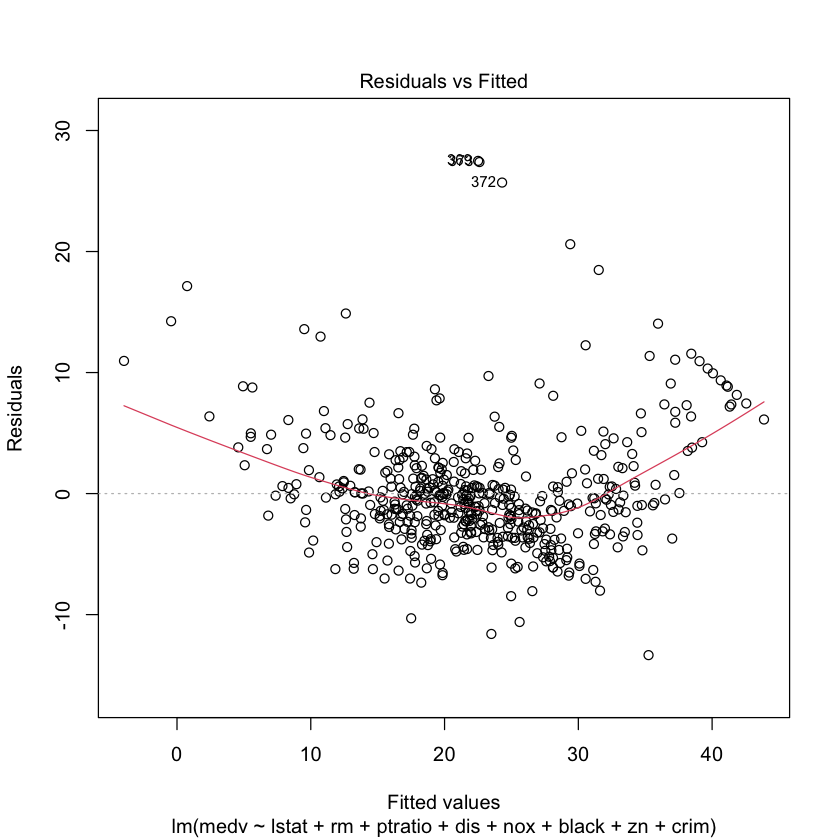

In [68]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_best, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Es decir, el modelo debería de capturar toda la varianza sistemática de los datos, dejando sólo ruido estocástico sin explicar. Por tanto, para que sea una evidencia positiva esta gráfica debe de verse sin un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos. En este caso, podemos ver como existe un cierto patrón, luego sería una `evidencia NEGATIVA`.

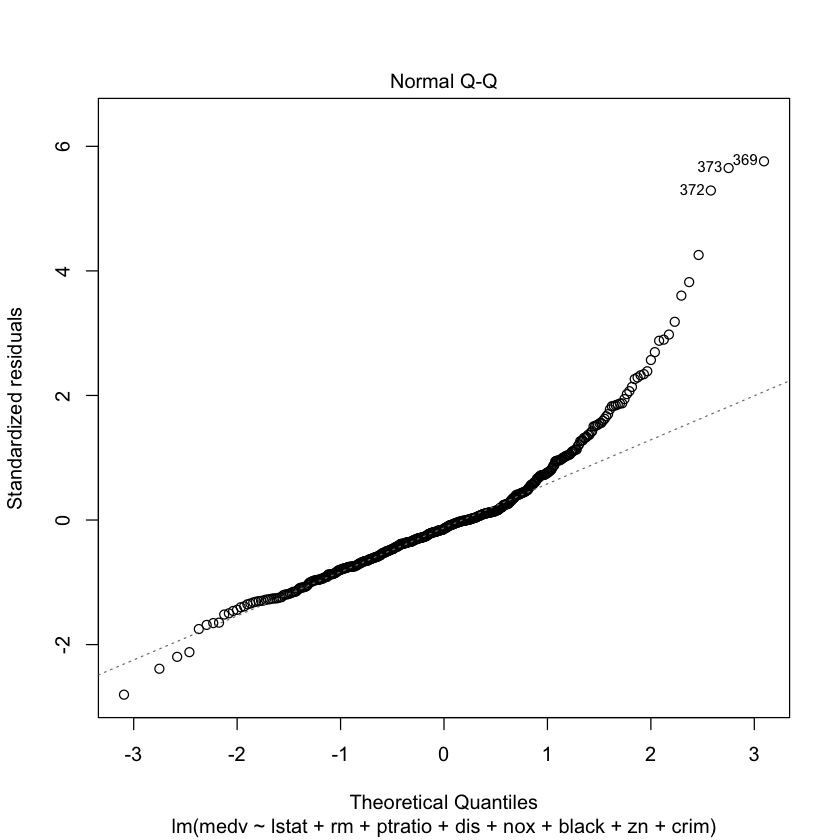

In [69]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_best, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una evidencia positiva en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. Si aparecen patrones tipo "S" o de ontra índole, como ocurre en este caso, sería una `evidencia NEGATIVA` de que los residuos no siguen una distribución normal. 

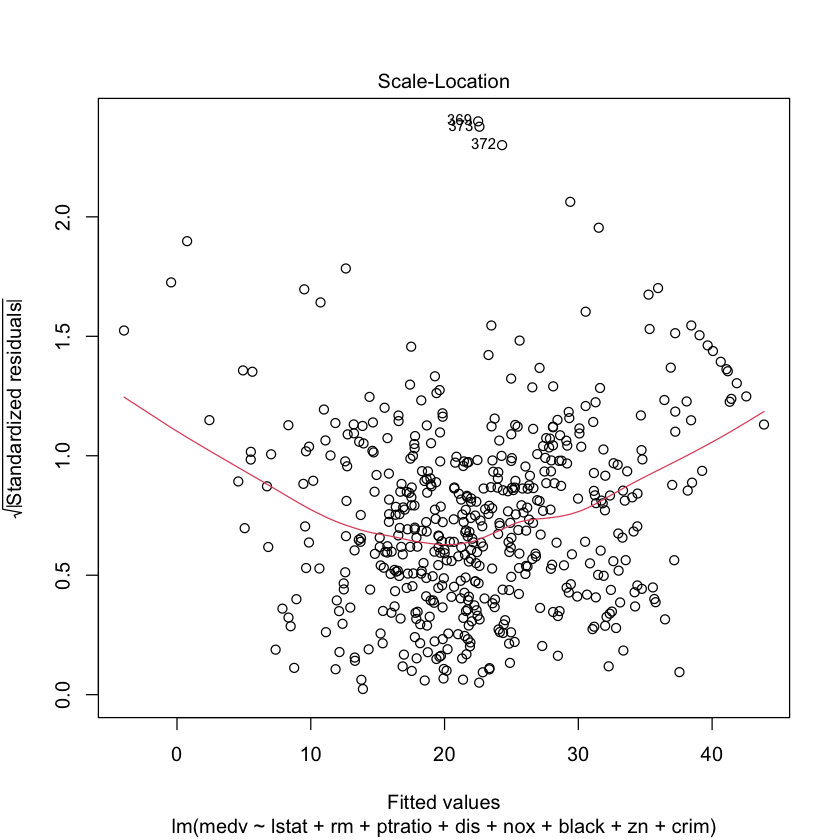

In [70]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_best, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una evidencia positiva en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En caso contrario, cómo ocurre con la última parte de la gráfica, sería una `evidencia NEGATIVA`. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos. 

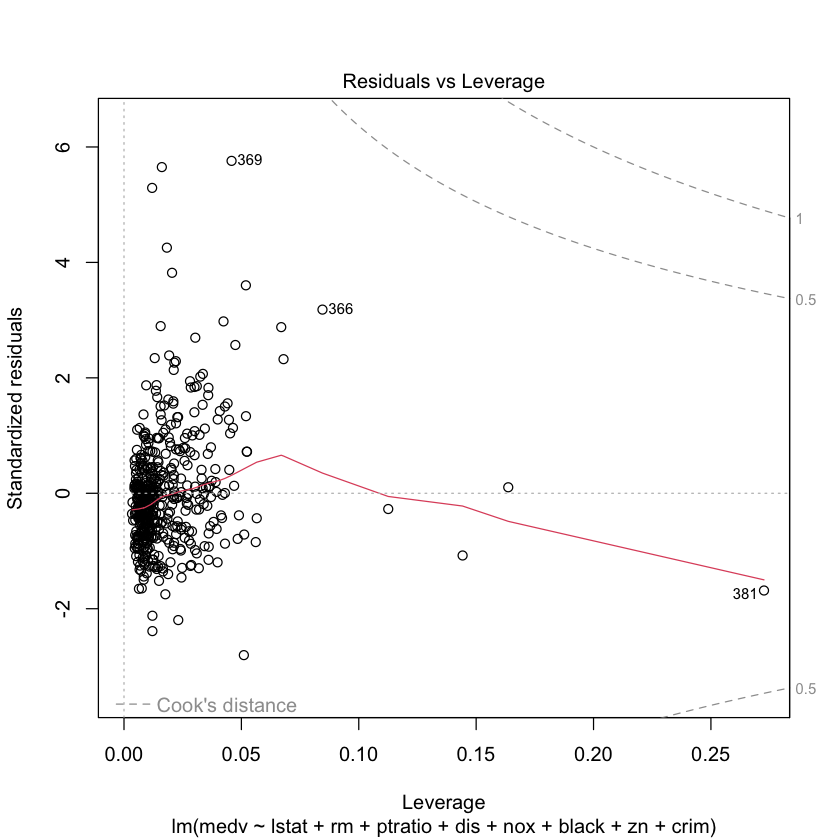

In [71]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_best, which=5)

**<u>Interpretación resultados</u>.-** La cuarta gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo: 

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook.  


* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una evidencia positiva en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. En este caso, podemos ver como existe, al menos, un punto que incumple dicha condición. Luego, sería una `evidencia NEGATIVA`. 


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha.

In [72]:
# Gráfico 5:
# Seleccionamos las 8 variables que nos interesan
xdata = wdata[, c("lstat", "rm", "ptratio", "dis", "nox", "black", "zn", "crim")]

In [73]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,lstat,rm,ptratio,dis,nox,black,zn,crim
lstat,1.0000000,-0.6138083,0.3740443,-0.4969958,0.5908789,-0.3660869,-0.4129946,0.4556215
rm,-0.6138083,1.0000000,-0.3555015,0.2052462,-0.3021882,0.1280686,0.3119906,-0.2192467
ptratio,0.3740443,-0.3555015,1.0000000,-0.2324705,0.1889327,-0.1773833,-0.3916785,0.2899456
dis,-0.4969958,0.2052462,-0.2324705,1.0000000,-0.7692301,0.2915117,0.6644082,-0.3796701
nox,0.5908789,-0.3021882,0.1889327,-0.7692301,1.0000000,-0.3800506,-0.5166037,0.4209717
black,-0.3660869,0.1280686,-0.1773833,0.2915117,-0.3800506,1.0000000,0.1755203,-0.3850639
zn,-0.4129946,0.3119906,-0.3916785,0.6644082,-0.5166037,0.1755203,1.0000000,-0.2004692
crim,0.4556215,-0.2192467,0.2899456,-0.3796701,0.4209717,-0.3850639,-0.2004692,1.0000000


**<u>Interpretación resultados</u>.-** La última matriz trata sobre la identificación del problema de multicolinealidad. Es decir, que exista relación entre las variables independientes. En caso afiramtivo, querría decir que dos o más variables, dependiendo de los resultados obtenidos, estarían aportando una capacidad explicativa común a nuestra variable dependiente. Luego, estaríamos redundando en la información. Por tanto, no sería un buen indicador. Por tanto, en este caso, vemos como en varios pares de variables el coeficiente de correlación es distinto de cero indicando la existencia de una relación entre las mismas. Luego, sería una `evidencia NEGATIVA`. Leer comentario al final de este ejercicio. Hay que hacer el contraste de correlación.

**<mark>Conclusión final diagnosis</marck>.-** En este ejercicio hemos obtenido dos evidencias positivas y cinco evidencias negativas por lo que en función de los resultados obtenidos del proceso de diagnosis gráfico de los residuos podemos afirmar que el mejor modelo seleccionado no sería del todo BUENO para explicar la variable nivel de precios de las viviendas consideradas. Aunque, como os comento, hasta que no realicemos las pruebas contrastadas no podríamos saber si esas evidencias (tanto positivas como negativas) son ciertas.

**¡Para sacar Nota!** Os dejo a ustedes que confirméis con evidencias numéricas y contrastadas las hipótesis de normalidad y homocedasticidad de los residuos y la existencia de una relación lineal entre los valores ajustados y los residuos. Con respecto a los outliers con las evidencias gráficas y el estadístico de la distancia de Cook es necesario para confirmar que la cumple. También tendréis que aplicar el contraste de correlación, al menos, a un par de variables para verificar que existe un problema de multicolinealidad. Con que halléis a través de dicho contraste que existe relación entre un par de variables dependientes, de momento, será suficiente para afirmar que tenemos un problema de multicolinealidad.

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

### Ejercicio 3

Utilizando el dataset `Prestige` de la libería $\tt carData$ que contiene información sobre el prestigio de diversas carreras o perfiles profesiones. Realizar un modelo de regresión lineal múltiple para explicar la variable `prestige` en función de la variable `education` que representa la formación media que se require para cada una de las ocupaciones (en años) y la variable `income` que representa los ingresos medios de cada una de los puestos de trabajo (en dólares). Responder a las siguientes cuestiones:

1. Ajustar el siguiente modelo de regresión lineal múltiple: $prest = \beta_0 + \beta_1 * educ + \beta_2 * inco + \epsilon$
2. Realizar la descomposición de valores ajustados y residuos del modelo estimado
3. Realizar una interpretación de los coeficientes del modelo estimado
4. Evaluar e interpretar la bondad de ajuste del modelo estimado ($R^2$ y $R^2_{adj}$)
5. Evaluar e interpretar la prueba de significatividad individual del modelo estimado
6. Evaluar e interpretar la prueba de significatividad global del modelo estimado
7. Evaluar e interpretar la multicolinealidad del modelo usando la matriz de correlaciones 

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 03</b></div>

<div style="background-color:#0BF7CC"><b> Nota.- En este caso, solo mostraré los resultados para que podáis verificar si lo habéis realizado correctamente o no. Podéis utilizar como referencia para comentar cada uno de los puntos las interpretaciones incluidas en los Notebooks teóricos y en las soluciones del resto de ejercicios anteriores. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Ajustar el siguiente modelo de regresión lineal múltiple  $prest = \beta_0 + \beta_1 * educ + \beta_2 * inco + \epsilon$</b></div>

Vamos a utilizar el conjunto de datos `Prestige` de la libería $\tt carData$ que contiene información sobre el prestigio de diversas carreras o perfiles profesiones. Estamos interesados en explicar precisamente el prestigio de diversas carreras o perfiles profesiones a partir de la formación media que se require para cada una de las ocupaciones (en años) y los ingresos medios de cada una de los puestos de trabajo (en dólares). En este caso, nuestra variable dependiente será `prestige` y las variables independientes serán `education` e `income`. 

In [74]:
# Instalamos la librería
install.packages("carData")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [75]:
# Cargamos la librería 
library(carData)

In [76]:
# Cargamos la base de datos que nos interesa
data(Prestige)

In [77]:
# Estructura de la base de datos 'Prestige'
str(Prestige)

'data.frame':	102 obs. of  6 variables:
 $ education: num  13.1 12.3 12.8 11.4 14.6 ...
 $ income   : int  12351 25879 9271 8865 8403 11030 8258 14163 11377 11023 ...
 $ women    : num  11.16 4.02 15.7 9.11 11.68 ...
 $ prestige : num  68.8 69.1 63.4 56.8 73.5 77.6 72.6 78.1 73.1 68.8 ...
 $ census   : int  1113 1130 1171 1175 2111 2113 2133 2141 2143 2153 ...
 $ type     : Factor w/ 3 levels "bc","prof","wc": 2 2 2 2 2 2 2 2 2 2 ...


In [78]:
# Clases de la base de datos 'Prestige'
class(Prestige)

[1] "data.frame"

In [79]:
# Dimensiones de la base de datos 'Prestige'
dim(Prestige)

[1] 102   6

In [80]:
# Variables de la base de datos 'Prestige'
names(Prestige)

[1] "education" "income"    "women"     "prestige"  "census"    "type"

In [81]:
# Seleccionamos las 3 variables que nos interesan
wdata=Prestige[, c("prestige", "education", "income")]

In [82]:
# Visualizamos la base de datos seleccionada
head(wdata)

,prestige,education,income
,<dbl>,<dbl>,<int>
gov.administrators,68.8,13.11,12351
general.managers,69.1,12.26,25879
accountants,63.4,12.77,9271
purchasing.officers,56.8,11.42,8865
chemists,73.5,14.62,8403
physicists,77.6,15.64,11030


In [83]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
zdata = na.omit(wdata)

In [84]:
# Podemos comprobar como NO existen datos missing
nrow(wdata) # Base de datos inicial
nrow(zdata) # Base de datos tras el na.omit

[1] 102

[1] 102

In [85]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD wdata o zdata indistintamente)
head(wdata)

,prestige,education,income
,<dbl>,<dbl>,<int>
gov.administrators,68.8,13.11,12351
general.managers,69.1,12.26,25879
accountants,63.4,12.77,9271
purchasing.officers,56.8,11.42,8865
chemists,73.5,14.62,8403
physicists,77.6,15.64,11030


In [86]:
# Realizamos el análisis exploratorio de las variables utilizadas 
summary(wdata)

    prestige       education          income     
 Min.   :14.80   Min.   : 6.380   Min.   :  611  
 1st Qu.:35.23   1st Qu.: 8.445   1st Qu.: 4106  
 Median :43.60   Median :10.540   Median : 5930  
 Mean   :46.83   Mean   :10.738   Mean   : 6798  
 3rd Qu.:59.27   3rd Qu.:12.648   3rd Qu.: 8187  
 Max.   :87.20   Max.   :15.970   Max.   :25879  

<div style="background-color:#0BF7CC"><b> Nota.- Recordad que tenéis que incluir un análisis más detallado de todos los estadísticos descriptivos e interpretar los resultados obtenidos tal y como se ha comentado en las sesiones teóricas. </b></div>

Antes de realizar ningún tipo de modelización tenéis que aseguraros que podemos aplicar un modelo de regresión entre las variables consideradas. Para ello, tiene que existir una relación entre las mismas. En caso contrario NO podremos realizar ningún tipo de análisis de regresión utilizando dichas vraiables.

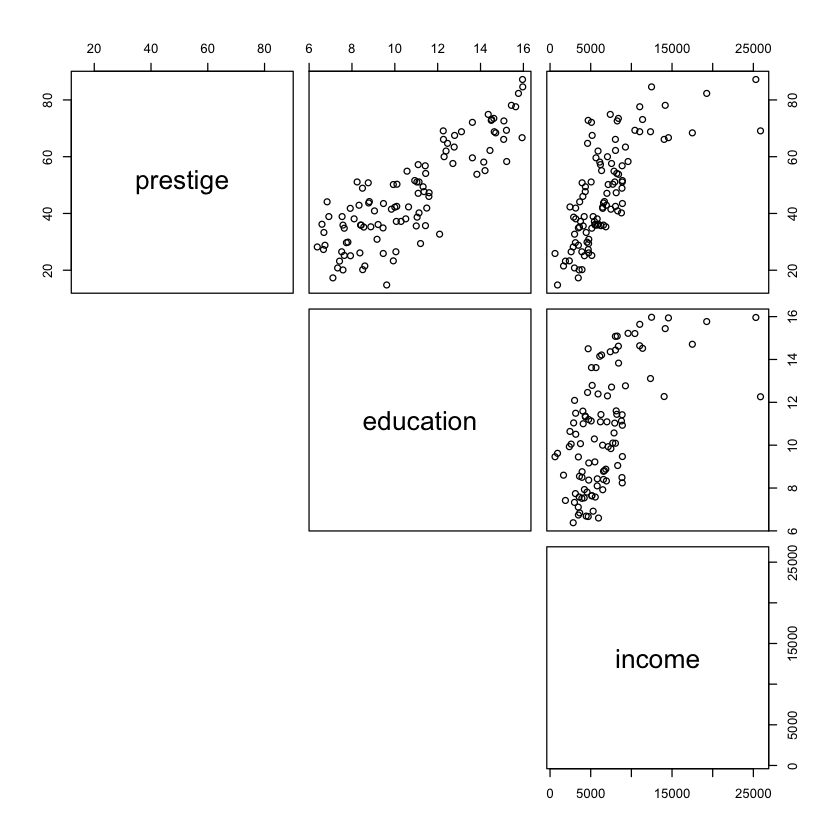

In [87]:
# Evidencia gráfica a través del gráfico de dispersión 
pairs(wdata, lower.panel = NULL)

**<u>Interpretación resultados</u>.-** Podemos observar en los gráficos de dispersión que no existe un patrón puramente aleatorio, es decir, que no nos aparece todo el cuadrado lleno de puntos colocados de manera aleatoria. Luego, este hecho, es una evidencia de que podría existir una relación entre las variables. Como siempre, tenemos que confirmarlo con las evidencias numéricas y contrastadas.

In [88]:
# Evidencia numérica
cor(wdata)

,prestige,education,income
prestige,1.0000000,0.8501769,0.7149057
education,0.8501769,1.0000000,0.5775802
income,0.7149057,0.5775802,1.0000000


**<u>Interpretación resultados</u>.-** En este caso, para obtener las evidencias numéricas tendremos que calcular el coeficiente de correlación. En particular, realizaremos un análisis de la correlación lineal entre la variable dependiente y cada una de las variables explicativas obteniendo la matriz de correlaciones. Observamos que en todos los casos el coeficiente de correlación estimado entre las variables independientes y la variable dependiente es distinto de $0$, con lo cual sería una evidencia de que las variables sí están relacionadas. Sin embargo, hasta que no realicemos el contraste de correlación no sabremos si está bien calculado dicho coeficiente y podemos tomarlo como válido. Vamos a contrastarlo.

In [89]:
# Evidencia contrastada (variable education)
cor.test(wdata$prestige, wdata$education)


	Pearson's product-moment correlation

data:  wdata$prestige and wdata$education
t = 16.148, df = 100, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7855899 0.8964367
sample estimates:
      cor 
0.8501769 


In [90]:
# Evidencia contrastada (variable income)
cor.test(wdata$prestige, wdata$income)


	Pearson's product-moment correlation

data:  wdata$prestige and wdata$income
t = 10.224, df = 100, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6044711 0.7983807
sample estimates:
      cor 
0.7149057 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido en los dos casos es muy pequeño siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, el prestigio de diversas carreras o perfiles profesiones SI está correlacionado con la formación media que se require para cada una de las ocupaciones (en años) y los ingresos medios de cada una de los puestos de trabajo (en dólares). Por tanto, SI podemos realizar la estimación de un modelo de regresión lineal entre dichas variables. En el caso de que alguna de ellas no estuviera relacionada con la variable dependiente tendríamos que eliminarla de nuestro estudio.

El Modelo de Regresión Lineal Múltiple (MRLM) que tenemos que estimar utilizando las funciones de R sería el siguiente: 

\begin{align*}
prestige_{i}&=\beta_{0}+\beta_{1}*education_{i}+\beta_{2}*income_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

In [91]:
# Estimación del modelo de regresión lineal múltiple incluyendo el dataset como parámetro
modelo = lm(prestige ~ education + income, data = wdata) 
modelo


Call:
lm(formula = prestige ~ education + income, data = wdata)

Coefficients:
(Intercept)    education       income  
  -6.847779     4.137444     0.001361  


In [92]:
# Observamos la estructura del output de la regresión
str(modelo)

List of 12
 $ coefficients : Named num [1:3] -6.84778 4.13744 0.00136
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "education" "income"
 $ residuals    : Named num [1:102] 4.59 -10 4.79 4.33 8.42 ...
  ..- attr(*, "names")= chr [1:102] "gov.administrators" "general.managers" "accountants" "purchasing.officers" ...
 $ effects      : Named num [1:102] -472.99 -147 47.41 4.21 8.71 ...
  ..- attr(*, "names")= chr [1:102] "(Intercept)" "education" "income" "" ...
 $ rank         : int 3
 $ fitted.values: Named num [1:102] 64.2 79.1 58.6 52.5 65.1 ...
  ..- attr(*, "names")= chr [1:102] "gov.administrators" "general.managers" "accountants" "purchasing.officers" ...
 $ assign       : int [1:3] 0 1 2
 $ qr           :List of 5
  ..$ qr   : num [1:102, 1:3] -10.1 0.099 0.099 0.099 0.099 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:102] "gov.administrators" "general.managers" "accountants" "purchasing.officers" ...
  .. .. ..$ : chr [1:3] "(Intercept)" "education" "income"


In [93]:
# Hacemos un summary del modelo
output = summary(modelo)
output


Call:
lm(formula = prestige ~ education + income, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.8477787  3.2189771  -2.127   0.0359 *  
education    4.1374444  0.3489120  11.858  < 2e-16 ***
income       0.0013612  0.0002242   6.071 2.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16


<div style="background-color:#5DADE2"><b>Apartado 2: Realizar una interpretación de los coeficientes del modelo estimado</b></div>

Vamos a <u>extraer los coeficientes de regresión</u> estimados a través de tres formas diferentes siendo todas ellas equivalentes:

* Extracción directa de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2})$ utilizando el objeto `output`.


* Extracción de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2})$ con la función $\tt coef$ sobre el `modelo` estimado.


* Cálculo manual de los coeficientes de regresión $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2})$ a partir de la siguiente ecuación formal. En el caso múltiple tenemos que proceder del siguiente modo. El estimador de MCO para los coeficientes $\hat{\beta}=(\hat{\beta}_{0},\hat{\beta}_{1},\hat{\beta}_{2})$ viene dado por la expresión: 

\begin{align*}
\hat \beta = {\left( {X'X} \right)^{ - 1}}X'y
\end{align*}

Para ello hemos necesitado construir la matriz de variables independientes $X=x_1, x_2$ y el vector de la variable dependiente $y$.

In [94]:
# Extracción directa de los coeficientes de regresión (utilizamos output NO modelo)
output$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-6.847778720,3.2189770963,-2.127315,3.587840e-02
education,4.137444384,0.3489120233,11.858131,1.032202e-20
income,0.001361166,0.0002242121,6.070886,2.355196e-08


In [95]:
# Extracción de los coeficientes de regresión con la función `coef`
bhat = coef(modelo)
bhat 

(Intercept)    education       income 
-6.847778720  4.137444384  0.001361166

In [96]:
# Cálculo manual de betas
y = wdata[, 1]
X = as.matrix(cbind(cte = 1, wdata[, 2:3]))  # Llamo a la columna de 1s, cte.
head(cbind(y, X))

,y,cte,education,income
gov.administrators,68.8,1,13.11,12351
general.managers,69.1,1,12.26,25879
accountants,63.4,1,12.77,9271
purchasing.officers,56.8,1,11.42,8865
chemists,73.5,1,14.62,8403
physicists,77.6,1,15.64,11030


In [97]:
# Calculamos los coeficientes estimados utilizando las matrices obtenidas en el paso anterior
betas = solve(t(X) %*% X) %*% t(X) %*% y
betas

cte,-6.847778720
education,4.137444384
income,0.001361166


<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 3: Realizar la descomposición de valores ajustados y residuos del modelo estimado</b></div>

#### ¿Cómo extraer los valores ajustados de la variable dependiente?

Vamos a extraer los valores ajustados de la variable dependiente a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de los valores ajustados de nuestra variable dependiente $\hat{y}$ sobre el `modelo` estimado.


+ Extracción de los valores ajustados de nuestra variable dependiente $\hat{y}$ con la función $\tt fitted$ sobre el `modelo` estimado.


+ Cálculo manual de los valores ajustados de nuestra variable dependiente $\hat{y}$ a partir de la siguiente ecuación formal:

\begin{align*}
\hat y_i&=\hat \beta_{0}+\hat \beta_{1}x_{i,1} + \hat \beta_{2}x_{i,2}  
\end{align*}

In [98]:
# Extracción directa de los valores ajustados de la variable dependiente
head(modelo$fitted.values)

gov.administrators    general.managers         accountants purchasing.officers 
           64.20588            79.10290            58.60675            52.46857 
           chemists          physicists 
           65.07953            72.87551

In [99]:
# Extracción de los valores ajustados de la variable dependiente con la función `fitted`
yhat = fitted(modelo)
head(yhat)

gov.administrators    general.managers         accountants purchasing.officers 
           64.20588            79.10290            58.60675            52.46857 
           chemists          physicists 
           65.07953            72.87551

In [100]:
# Cálculo manual de los valores ajustados 
yajustado = bhat[1]+bhat[2]*wdata$education+bhat[3]*wdata$income
head(yajustado)

[1] 64.20588 79.10290 58.60675 52.46857 65.07953 72.87551

In [101]:
# Cálculo manual de los valores ajustados (alternativa b)
yajustado1 = bhat["(Intercept)"]+bhat["education"]*wdata$education+bhat["income"]*wdata$income
head(yajustado1)

[1] 64.20588 79.10290 58.60675 52.46857 65.07953 72.87551

#### ¿Cómo extraer los residuos estimados?

Vamos a extraer los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los residuos estimados $\hat{\epsilon}$ sobre el `modelo` estimado.


+ Extracción del valor de los residuos estimados $\hat{\epsilon}$ con la función $\tt resid$ sobre el `modelo`  estimado.


+ Cálculo manual del valor de los residuos estimados $\hat{\epsilon}$ a partir de la siguiente ecuación formal. Es decir, los resiudos se calculan como la diferencia entre el valor predicho o ajustado y el valor real tal entre cada individuo $i=1,..., n$.

\begin{align*}
\hat \epsilon_i = y_i - \hat y_i 
\end{align*}

In [102]:
# Extracción directa del valor de los residuos estimados
head(modelo$residuals)

gov.administrators    general.managers         accountants purchasing.officers 
           4.594123          -10.002900            4.793245            4.331429 
           chemists          physicists 
           8.420465            4.724489

In [103]:
# Extracción del valor de los residuos estimados con la función `resid`
uhat = resid(modelo)
head(uhat)

gov.administrators    general.managers         accountants purchasing.officers 
           4.594123          -10.002900            4.793245            4.331429 
           chemists          physicists 
           8.420465            4.724489

In [104]:
# Cálculo manual del valor de los residuos
residuos = wdata$prestige-yajustado
head(residuos)

[1]   4.594123 -10.002900   4.793245   4.331429   8.420465   4.724489

In [105]:
# Comprobamos y = y_estimado + residuos_estimados
head(cbind(wdata$prestige,yhat,yajustado,yajustado1,uhat,residuos))

,,yhat,yajustado,yajustado1,uhat,residuos
gov.administrators,68.8,64.20588,64.20588,64.20588,4.594123,4.594123
general.managers,69.1,79.10290,79.10290,79.10290,-10.002900,-10.002900
accountants,63.4,58.60675,58.60675,58.60675,4.793245,4.793245
purchasing.officers,56.8,52.46857,52.46857,52.46857,4.331429,4.331429
chemists,73.5,65.07953,65.07953,65.07953,8.420465,8.420465
physicists,77.6,72.87551,72.87551,72.87551,4.724489,4.724489


In [106]:
# Comprobamos y = y_estimado + residuos_estimados (1º observación)
64.20588+4.594123 

[1] 68.8

<div style="background-color:#5DADE2"><b>Apartado 4: Evaluar e interpretar la bondad de ajuste del modelo estimado ($R^2$ y $R^2_{adj}$)</b></div>

#### ¿Cómo extraer la suma de cuadrados de los residuos? 

Vamos a extraer la suma de cuadrados de los residuos estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa de la suma de cuadrados de los residuos denotado por $SSR$ o $\hat{\sigma}$ utilizando el objeto `output`. Este estadístico cuantifica cuánta información de la variable dependiente se pierde con el modelo empleado (variables independientes utilizadas). Es útil cuándo lo comparamos con otros modelos.


+ Extracción del valor de la suma de cuadrados de los residuos con la función $\tt deviance$ sobre el `modelo` estimado.


+ Cálculo manual del valor de la suma de cuadrados de los residuos a partir de la siguiente ecuación formal:

\begin{align*}
SSR = \hat \sigma = \sqrt {\frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{n - k}}}
\end{align*}

In [107]:
# Extracción directa de la suma de cuadrados de los residuos (utilizamos output NO modelo)
head(output$sigma)

[1] 7.810153

In [108]:
# Extracción del valor de la suma de cuadrados de los residuos con la función `deviance`
ssr = sqrt(deviance(modelo)/df.residual(modelo))
ssr

[1] 7.810153

In [109]:
# Cálculo manual del valor de la suma de cuadrados de los residuos
resi2 = (residuos)^2
sigma = sqrt(sum(resi2)/df.residual(modelo))
sigma

[1] 7.810153

#### ¿Cómo extraer los coeficientes de determinación?

Vamos a extraer los coeficientes de determinación estimados a través de tres formas diferentes siendo todas ellas equivalentes:

+ Extracción directa del valor de los coeficientes de determinación utilizando el objeto `output`.


+ Cálculo manual del coeficiente de determinación a partir de la siguiente ecuación formal: (Opción 1)

\begin{align*}
R^{2}=1 - \frac{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\hat y}_i}} \right)}^2}} }}{{\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }}
\end{align*}

siendo ${\sum\limits_{i = 1}^n {{{\left( {{y_i} - {{\bar y}_i}} \right)}^2}} }$ la suma del cuadrado de la diferencia entre los valores originales de la variable dependiente $y_i$ y el valor promedio de la variable $\bar y_i$.

In [110]:
# Extracción directa del valor de los coeficientes de determinación
# Obtenemos R2 (utilizamos output NO modelo)
R2 = output$r.squared
R2

[1] 0.7980008

In [111]:
# Cálculo manual del coeficiente de determinación (Opción 1)
residuos2 = wdata$prestige-mean(wdata$prestige)
residuos2

[1]  21.9666667  22.2666667  16.5666667   9.9666667  26.6666667  30.7666667
  [7]  25.7666667  31.2666667  26.2666667  21.9666667  15.1666667  13.1666667
 [13]   6.9666667  15.3666667  28.0666667   8.2666667  35.4666667  11.2666667
 [19]  11.4666667  25.9666667  37.7666667  12.7666667  19.2666667  40.3666667
 [25]  19.8666667  21.5666667  17.8666667 -11.9333333  25.2666667  22.4666667
 [31]  20.6666667  10.3666667  10.7666667   7.2666667  -0.8333333  -4.9333333
 [37]   2.5666667  -4.5333333   0.8666667 -15.9333333 -14.1333333  -8.1333333
 [43] -10.7333333  -9.6333333  -8.7333333 -17.4333333   4.2666667 -11.1333333
 [49] -11.2333333  -5.3333333  -6.6333333 -20.3333333 -32.0333333 -23.5333333
 [55]   0.4666667   0.2666667   4.2666667  -3.3333333   4.7666667 -17.1333333
 [61] -26.6333333   8.0666667 -20.9333333 -26.0333333 -29.5333333 -26.7333333
 [67]  -2.7333333 -25.3333333 -11.5333333  -7.9333333 -21.6333333 -12.0333333
 [73] -23.6333333 -13.5333333 -18.0333333  -4.3333333  -2.6333333 -10.9333333
 [79]  -5.0333333 -10.9333333  -3.1333333   3.9666667  -9.6333333 -18.6333333
 [85]  -8.7333333   3.4666667 -19.5333333  -5.9333333   3.3666667   4.2666667
 [91]  -7.9333333 -10.6333333 -16.9333333  -3.9333333 -20.3333333  19.2666667
 [97]   2.0666667 -10.9333333 -21.7333333 -20.7333333  -4.6333333 -11.6333333

In [112]:
# Cálculo manual del coeficiente de determinación (Opción 1)
R2.1 = 1-(sum(resi2)/sum((residuos2)^2))
R2.1

[1] 0.7980008

In [113]:
# Cálculo manual del coeficiente de determinación (Opción 2)
R2.2 = var(yhat)/var(wdata$prestige)
R2.2

[1] 0.7980008

In [114]:
# Comprobamos que obtenemos el mismo resultado de las tres maneras
cbind(R2,R2.1,R2.2)

R2,R2.1,R2.2
0.7980008,0.7980008,0.7980008


La ecuación de $R^2_{adj}$ sería la siguiente:

\begin{align*}
R_{adj}^2 = 1 - \left( {1 - {R^2}} \right)\frac{{n-1}}{{n-k}}
\end{align*}

siendo $n$ el número de obervaciones totales y $k$ el número de parámetros estimados. En la ecuación se puede observar que al encontrarse el parámetro $k$ en el denominador, disminuye el valor alcanzado por $R^2_{adj}$ a medida que se incorpore una nueva variable independiente (un nuevo parámetro estimado).

In [115]:
# Obtenemos R2 ajustado directamente del output (NO del modelo)
R2adj = output$adj.r.squared
R2adj

[1] 0.7939201

In [116]:
# Obtenemos R2 ajustado a través de su ecuación formal 1-(1-R2)*(n-1/n-k)
# k = número parámetros estimados
# n = número de observaciones
R2adj_2 = 1-(1-R2)*((102-1)/(102-3))
R2adj_2

[1] 0.7939201

<div style="background-color:#5DADE2"><b>Apartado 5: Evaluar e interpretar la prueba de significatividad individual del modelo estimado</b></div>

In [117]:
# Obtenemos los p-valores de la prueba de significatividad individual 
summary(modelo)


Call:
lm(formula = prestige ~ education + income, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.8477787  3.2189771  -2.127   0.0359 *  
education    4.1374444  0.3489120  11.858  < 2e-16 ***
income       0.0013612  0.0002242   6.071 2.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16


<div style="background-color:#0BF7CC"><b> Nota.- Seguir indicaciones realizadas en las sesiones teóricas para realizar la interpretación del contraste de significatividad individual. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 6: Evaluar e interpretar la prueba de significatividad global del modelo estimado</b></div>

In [118]:
# Obtenemos el p-valor de la prueba de significatividad conjunta (F-statistic + p-value)
summary(modelo)


Call:
lm(formula = prestige ~ education + income, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4040  -5.3308   0.0154   4.9803  17.6889 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.8477787  3.2189771  -2.127   0.0359 *  
education    4.1374444  0.3489120  11.858  < 2e-16 ***
income       0.0013612  0.0002242   6.071 2.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 99 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7939 
F-statistic: 195.6 on 2 and 99 DF,  p-value: < 2.2e-16


<div style="background-color:#0BF7CC"><b> Nota.- Seguir indicaciones realizadas en las sesiones teóricas para realizar la interpretación del contraste de significatividad conjunto. </b></div>

<div style="background-color:#5DADE2"><b>Apartado 7: Evaluar e interpretar la multicolinealidad del modelo usando la matriz de correlaciones </b></div>

In [119]:
# Seleccionamos las 2 variables que nos interesan
xdata = wdata[, c("education", "income")]

In [120]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,education,income
education,1.0000000,0.5775802
income,0.5775802,1.0000000


In [121]:
cor.test(xdata$education,xdata$income)


	Pearson's product-moment correlation

data:  xdata$education and xdata$income
t = 7.0753, df = 100, p-value = 2.079e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4315828 0.6940914
sample estimates:
      cor 
0.5775802 


**<u>Interpretación resultados</u>.-** El $p$-valor obtenido es muy pequeño siendo $< \alpha = 0.05$, luego tenemos que rechazar la hipótesis nula de que la correlación sea igual $0$, es decir, tanto la formación media que se require para cada una de las ocupaciones (en años) y los ingresos medios de cada una de los puestos de trabajo (en dólares) SI está correlacionado. Por tanto, esto sería una evidencia de que existe un problema de multicolinealidad ya que las dos variables independientes NO son independientes sino que están relacionadas entre sí. 

### Ejercicio 4

Considerar la información de la base de datos `birthwt` de la librería $\tt MASS$ que contiene información sobre diferentes factores de riesgo asociados al bajo peso al nacer de 189 bebés pertenecientes a un estudio realizado en el Hospital de la Paz (Madrid) el pasado año. Encontrar de forma automática el mejor modelo de regresión lineal múltiple de la variable dependiente `bwt` que indica el peso al nacer de los bebés en gramos en función del resto de variables. Comparar sus métricas y realizar la diagnosis del modelo de regresión elegido. Es decir, tenéis que hacer los siguientes pasos:

1. Criterios de selección del modelo en base al ajuste de los datos
2. Proceso de automatización del proceso de selección del mejor modelo
3. Requisitos y validación del mejor modelo seleccionado en base al ajuste de los datos

<div style="background-color:#F7DC6F"><b>Resolución Ejercicio 04</b></div>

<div style="background-color:#0BF7CC"><b> Nota.- En este ejercicio tenéis que hacer los mismos pasos que hemos realizado en el ejercicio no. 2. Al utilizar otra base de datos y diferentes variables, los resultados y por tanto, las interpretaciones, serán diferentes pero la estructura del ejercicio es la misma (paso a paso). </b></div>

<div style="background-color:#5DADE2"><b>Apartado 1: Criterios de selección del modelo en base al ajuste de los datos</b></div>

Vamos a utilizar el conjunto de datos `birthwt` de la libería $\tt MASS$ que contiene información sobre diferentes factores de riesgo asociados al bajo peso al nacer de 189 bebés pertenecientes a un estudio realizado en el Hospital de la Paz (Madrid) el pasado año. Encontrar de forma automática el mejor modelo de regresión lineal múltiple de la variable dependiente `bwt` que indica el peso al nacer de los bebés en gramos en función del resto de variables. Normalmente se utilizan los siguientes criterios de selección de modelos para este fin (igual que en el caso simple):

1. Comparación del coeficiente de determinación ajustado: el modelo con un mayor $R^2_{adj}$ será el mejor de los comparados. 


2. Comparación de los criterios de información de Akaike (AIC) y Bayesiano (BIC): cuanto menor sea el valor, mejor será el ajuste realizado. La diferencia entre AIC y BIC es la severidad con la que penalizan el número de parámetros considerados. La fórmula de cada uno de ellos es la siguiente:

- $AIC = n\ln \left( {SSR/n} \right) + 2k$

- $BIC = n\ln \left( {SSR/n} \right) + k\ln \left( n \right)$

donde $SSR$ indica la suma de los cuadrados de los residuos, cuantifica cuánta información de la variable dependiente se pierde con el modelo, el número de variables utilizado $k$ y el número total de observaciones $n$. Teniendo en cuenta que nuestra variable dependiente será `bwt`, nos preguntamos: ¿cuál es el mejor modelo de regresión lineal múltiple que podemos obtener considerando la base de datos $\tt birthwt$?

In [122]:
# Cargamos la base de datos que nos interesa
data(birthwt)

In [123]:
# Estructura de la base de datos 'birthwt'
str(birthwt)

'data.frame':	189 obs. of  10 variables:
 $ low  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : int  2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: int  0 0 1 1 1 0 0 0 1 1 ...
 $ ptl  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ui   : int  1 0 0 1 1 0 0 0 0 0 ...
 $ ftv  : int  0 3 1 2 0 0 1 1 1 0 ...
 $ bwt  : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...


In [124]:
# Clases de la base de datos 'birthwt'
class(birthwt)

[1] "data.frame"

In [125]:
# Dimensiones de la base de datos 'birthwt'
dim(birthwt)

[1] 189  10

In [126]:
# Variables de la base de datos 'birthwt'
names(birthwt)

[1] "low"   "age"   "lwt"   "race"  "smoke" "ptl"   "ht"    "ui"    "ftv"  
[10] "bwt"

In [127]:
# Comprobamos si existen datos NAs para en caso afirmativo, eliminarlos y que no nos den problemas
wdata = na.omit(birthwt)

In [128]:
# Podemos comprobar como NO existen datos missing
nrow(birthwt) # Base de datos inicial
nrow(wdata) # Base de datos tras el na.omit

[1] 189

[1] 189

In [129]:
# Visualizamos la base de datos seleccionada (podemos utilizar las BD birthwt o wdata indistintamente)
head(wdata)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


<div style="background-color:#0BF7CC"><b> Nota.- En el caso múltiple, como estuvimos viendo en las sesiones teóricas, NO tiene sentido que nos pongamos a definir los modelos uno a uno como ocurría en el caso simple así que tenemos que automatizar este proceso de búsqueda del mejor modelo.

<div style="background-color:#5DADE2"><b>Apartado 2: Proceso de automatización del proceso de selección del mejor modelo</b></div>

Como ya hemos indicado en el ejercicio no.2, el proceso manual es tedioso para encontrar cuál es la mejor combinación de variables y el número de casos es demasiado elevado. Para ayudarnos en esta tarea, en R disponemos de la función **`step(x,direction=...,scope=...,k=...)`** de la librería $\tt stats$ que, a partir de un modelo lineal dado `x`, va probando diferentes modelos añadiendo o eliminando variables independientes hasta encontrar un modelo óptimo (entre todos los modelos que se puedan obtener de esta manera). Esta función realiza un proceso iterativo de eliminación o adición de variables consiguiendo en cada paso del algoritmo un modelo con un valor de AIC (o BIC) menor al modelo obtenido en el paso anterior. El proceso se para cuando no encuentra ningún modelo mejor. Ejecutemos esta función con el modelo que considera todas las variables, usando el AIC para valorar los modelos y con `direction="backward"`, es decir, eliminando variables una a una.

In [130]:
# 1º Tenemos que estimar el modelo con todas las variables
mod_full = lm(bwt ~ ., data = wdata)
summary(mod_full)


Call:
lm(formula = bwt ~ ., data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-991.22 -300.96   -5.39  277.74 1637.80 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3612.508    229.457  15.744  < 2e-16 ***
low         -1131.217     73.957 -15.296  < 2e-16 ***
age            -6.245      6.347  -0.984 0.326416    
lwt             1.051      1.133   0.927 0.355085    
race         -100.905     38.544  -2.618 0.009605 ** 
smoke        -174.116     72.000  -2.418 0.016597 *  
ptl            81.340     68.552   1.187 0.236980    
ht           -181.955    137.661  -1.322 0.187934    
ui           -336.776     93.314  -3.609 0.000399 ***
ftv            -7.578     30.992  -0.245 0.807118    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 433.7 on 179 degrees of freedom
Multiple R-squared:  0.6632,	Adjusted R-squared:  0.6462 
F-statistic: 39.16 on 9 and 179 DF,  p-value: < 2.2e-16


In [131]:
# 2º Búsqueda automática del modelo óptimo hacia atrás
step(mod_full,direction="backward")

Start:  AIC=2305.09
bwt ~ low + age + lwt + race + smoke + ptl + ht + ui + ftv

        Df Sum of Sq      RSS    AIC
- ftv    1     11246 33682899 2303.2
- lwt    1    161709 33833361 2304.0
- age    1    182159 33853812 2304.1
- ptl    1    264837 33936490 2304.6
- ht     1    328638 34000291 2304.9
<none>               33671653 2305.1
- smoke  1   1100074 34771727 2309.2
- race   1   1289179 34960832 2310.2
- ui     1   2450185 36121838 2316.4
- low    1  44009294 77680946 2461.1

Step:  AIC=2303.15
bwt ~ low + age + lwt + race + smoke + ptl + ht + ui

        Df Sum of Sq      RSS    AIC
- lwt    1    154400 33837299 2302.0
- age    1    205543 33888442 2302.3
- ptl    1    268799 33951698 2302.7
- ht     1    319845 34002744 2302.9
<none>               33682899 2303.2
- smoke  1   1095243 34778142 2307.2
- race   1   1280252 34963151 2308.2
- ui     1   2442561 36125460 2314.4
- low    1  44045331 77728230 2459.2

Step:  AIC=2302.02
bwt ~ low + age + race + smoke + ptl + ht + ui

 


Call:
lm(formula = bwt ~ low + race + smoke + ui, data = wdata)

Coefficients:
(Intercept)          low         race        smoke           ui  
    3586.50     -1139.20       -97.34      -157.42      -303.19  


**<u>Interpretación resultados</u>.-** Como sabemos, al inicio del algoritmo, tenemos en Start el modelo inicial, entrado a la función $\tt step$, y su valor de AIC. A continuación, en cada paso se disponen en una tabla las variables y el valor de AIC que obtendría el modelo si se eliminara la variable en cuestión. Las variables aparecen en la tabla ordenadas en orden ascendente del AIC que se obtiene al eliminarlas, y el modelo actual se indica por medio de $\tt <none>$ (no se elimina ninguna variable). 

Así, en la primera iteración se eliminará la variable `ftv` ya que su eliminación proporciona un modelo con un valor mínimo $AIC=2303.2$ que es menor que el valor del modelo inicial $(2305.09)$. Luego, al principio de cada iteración sucesiva se indica la fórmula correspondiente al modelo en ese momento. En la segunda iteración, ya se ha eliminado la variable `ftv`, se calculan los AIC y como la variable `lwt` da un valor mínimo de AIC, será la variable que se eliminará. Y así sucesivamente.

El algoritmo finaliza cuando si se elimina cualquiera de las variables restantes, aumenta el AIC empeorando el modelo: corresponde a la situación en la que la variable $\tt <none>$ aparece en la primera fila de la tabla de valores AIC. En este caso, se eliminan $5$ variables resultando un modelo de regresión con cuatro variables independientes y con un valor de $AIC=2299.26$. La última parte de la salida de la función nos da las variables y los coeficientes de regresión del modelo que mejor se ajusta de todos los posibles.

Ahora, ejecutemos a continuación la función $\tt step$ pero ahora con `direction="forward"` desde un modelo sin variables independientes (que se indica con ~1) y un rango que permita llegar al modelo completo con todas las variables.

In [132]:
# 1º Tenemos que estimar el modelo más sencillo (modelo cte) 
mod_cte = lm(bwt~1,data=wdata)
summary(mod_cte)


Call:
lm(formula = bwt ~ 1, data = wdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-2235.59  -530.59    32.41   542.41  2045.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2944.59      53.04   55.51   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 729.2 on 188 degrees of freedom


In [133]:
# 2º Búsqueda automática del modelo óptimo hacia delante
step(mod_cte,direction="forward",scope=list(lower=mod_cte, upper=mod_full)) # con forward hay que poner el scope

Start:  AIC=2492.76
bwt ~ 1

        Df Sum of Sq      RSS    AIC
+ low    1  61573224 38396432 2313.9
+ ui     1   8059031 91910625 2478.9
+ race   1   3790184 96179472 2487.5
+ smoke  1   3625946 96343710 2487.8
+ lwt    1   3448639 96521017 2488.1
+ ptl    1   2391041 97578614 2490.2
+ ht     1   2130425 97839231 2490.7
<none>               99969656 2492.8
+ age    1    815483 99154173 2493.2
+ ftv    1    339993 99629663 2494.1

Step:  AIC=2313.91
bwt ~ low

        Df Sum of Sq      RSS    AIC
+ ui     1   2354601 36041831 2303.9
+ race   1    763763 37632669 2312.1
+ smoke  1    417505 37978926 2313.8
<none>               38396432 2313.9
+ lwt    1    284886 38111546 2314.5
+ ht     1     71336 38325096 2315.6
+ ftv    1      7961 38388470 2315.9
+ age    1       929 38395503 2315.9
+ ptl    1        61 38396371 2315.9

Step:  AIC=2303.95
bwt ~ low + ui

        Df Sum of Sq      RSS    AIC
+ race   1    683419 35358412 2302.3
<none>               36041831 2303.9
+ smoke  1    34


Call:
lm(formula = bwt ~ low + ui + race + smoke, data = wdata)

Coefficients:
(Intercept)          low           ui         race        smoke  
    3586.50     -1139.20      -303.19       -97.34      -157.42  


**<u>Interpretación resultados</u>.-** En este caso, se eliminan también $5$ variables independientes resultando un modelo de regresión con cuatro variables independientes y con un valor de $AIC=2299.26$ igual que en el caso anterior. Eso quiere decir, que el modelo encontrado por ambas vías es el óptimo. Si nos hubiera salido uno diferente, tendríamos que comparar este con el mejor obtenido en el procedimiento `direction="backward"` y nos quedaríamos con el que tuviese un menor AIC. Luego, el modelo que mejor se ajusta al conjunto de datos proporcionado a la hora de explicar el nivel de precios de las viviendas es el siguiente:

\begin{align*}
bwt_{i}&=\hat \beta_{0}+\hat\beta_{1}*low_{i}+\hat\beta_{2}*ui_{i}+\hat\beta_{3}*race_{i}+\hat\beta_{4}*smoke_{i}+\epsilon_{i} \quad i=1,\dots,n\\
\end{align*}

donde $\hat \beta_0=3586.50$, $\hat \beta_1=-1139.20$, $\hat \beta_2=-303.19$, $\hat \beta_3=-97.34$, $\hat \beta_4=-157.42$.

<div style="background-color:#5DADE2"><b>Apartado 3: Requisitos y validación del mejor modelo seleccionado en base ajuste de los datos</b></div>

Finalmente, tenemos que comprobar si el mejor modelo seleccionado es BUENO o NO. Es decir, tenemos que validar el modelo ya que podría ser el menos malo de todos los modelos que hemos comparado. Este proceso se denomina la diagnosis del modelo seleccionado y se centra en el análisis de los residuos (errores). Para que sea considerado bueno deberá de cumplir la mayoría de las siguientes condiciones. 

* Relativos al modelo [Gráfico 1]: Queremos comprobar si las variables están linealmente relacionadas. Para ello, hay que representar los valores de los residuos vs valores predichos `(Residuals vs Fitted)`.


* Relativos a los residuos [Gráficos 2-3]: Tenemos que saber si los errores del modelo siguen una distribución normal con media 0 y varianza $σ^2$ constante. Para ello, contamos con el gráfico Q-Q `(Q-Q plot)` que sirve para examinar la normalidad de los residuos y además, hay que representar gráficamente los valores predichos vs raíz cuadrada de los residuos estandarizados `(Fitted vs Square Standarized Residuals)` que sirve para comprobar la homocedasticidad del modelo, es decir, si la varianza de los errores es constante y no depende del valor de las variables independientes.

  
* Relativos a las observaciones anómalas [Gráfico 4]: Hay que comporbar si algunas de las observaciones no se ajusten al modelo, comprometiendo su validez general. Para ello, representaremos gráficamente los valores de los residuos del modelo para identificar observaciones influyentes `(Residuals vs Leverage)`.


* Relativos a las variables independientes [Gráfico 5]: En el caso de los modelos de regresión múltiple es de especial interés el fenómeno de la colinealidad (o multicolinealidad). Cuando algunas variables explicativas estén altamente correlacionadas entre sí, tendremos una situación de alta colinealidad, y esto es un problema. En este caso, solamente os voy a pedir que lo indiquéis y nada más a través de los coeficientes de correlación `(Matriz correlaciones)`. En general, los métodos de selección de variables como los que hemos vistos anteriormente solucionan automáticamente este problema pero siempre hay que comprobarlo.

In [134]:
# Definimos el modelo que mejor se ajusta a los datos 
mod_best = lm(formula = bwt ~ low + ui + race + smoke, data = wdata)
summary(mod_best)


Call:
lm(formula = bwt ~ low + ui + race + smoke, data = wdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1025.8  -351.0    30.8   285.8  1500.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3586.50      86.68  41.379  < 2e-16 ***
low         -1139.20      71.12 -16.019  < 2e-16 ***
ui           -303.19      90.02  -3.368 0.000922 ***
race          -97.34      37.37  -2.605 0.009942 ** 
smoke        -157.42      70.38  -2.237 0.026510 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 432.5 on 184 degrees of freedom
Multiple R-squared:  0.6557,	Adjusted R-squared:  0.6482 
F-statistic: 87.59 on 4 and 184 DF,  p-value: < 2.2e-16


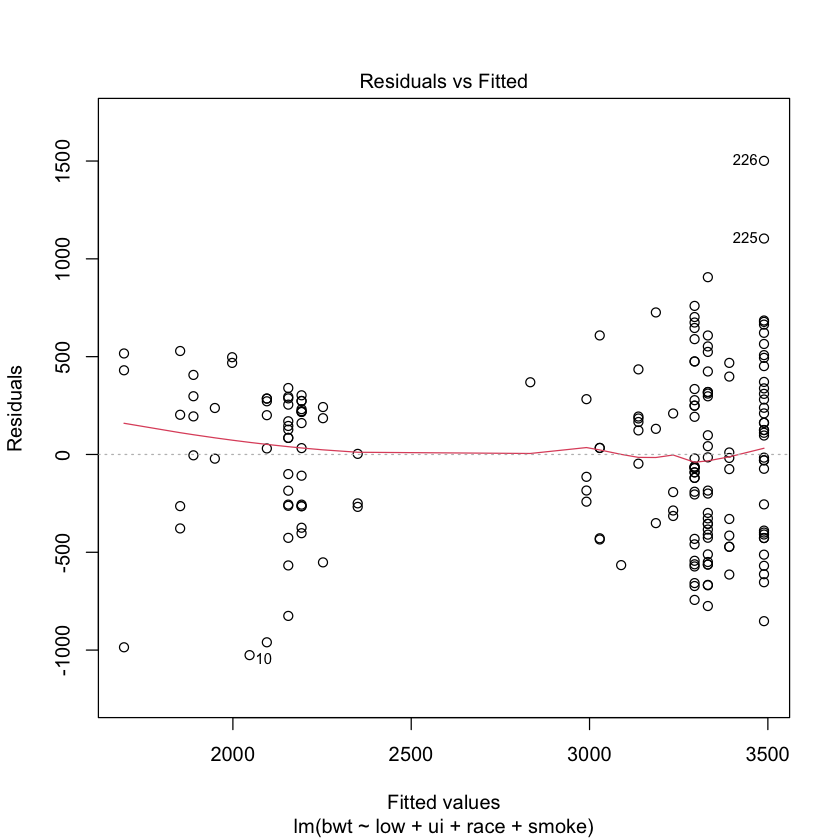

In [135]:
# Gráfico 1: Diagnosis para ver si los residuos y los valores ajustados están linealmente relacionados
plot(mod_best, which=1)

**<u>Interpretación resultados</u>.-** La primera gráfica nos ayuda a decidir si las variables están linealmente relacionadas. Si es así, NO debería de existir una relación sistemática entre los resíduos (errores) y los valores predichos (ajustados). Es decir, el modelo debería de capturar toda la varianza sistemática de los datos, dejando sólo ruido estocástico sin explicar. Por tanto, para que sea una evidencia positiva esta gráfica debe de verse sin un patrón claro de asociación apareciendo todo cuadro del gráfico lleno de puntos. En este caso, podemos ver como existe un cierto patrón, luego sería una `evidencia NEGATIVA`.

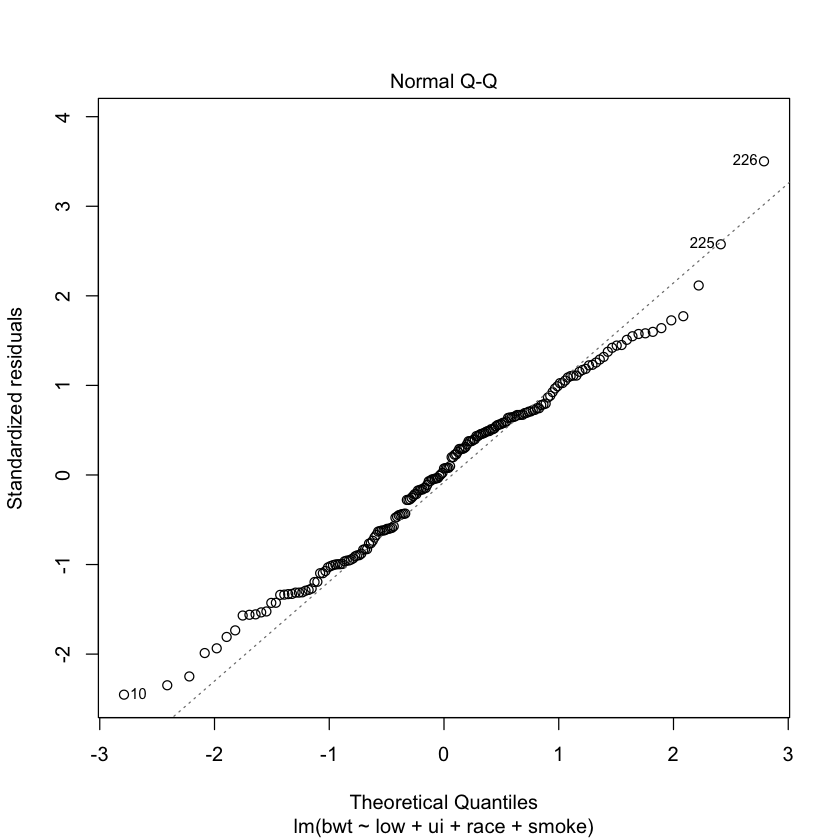

In [136]:
# Gráfico 2: Diagnosis para comprobar si los residuos se distribuyen como una normal
plot(mod_best, which=2)

**<u>Interpretación resultados</u>.-** La segunda es la gráfica de quantil-quantil sobre la normalidad de los residuos. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica los puntos deberían seguir la diagonal si los residuos están normalmente distribuidos. Si aparecen patrones tipo "S" o de ontra índole sería una evidencia negativa de que los residuos no siguen una distribución normal. 

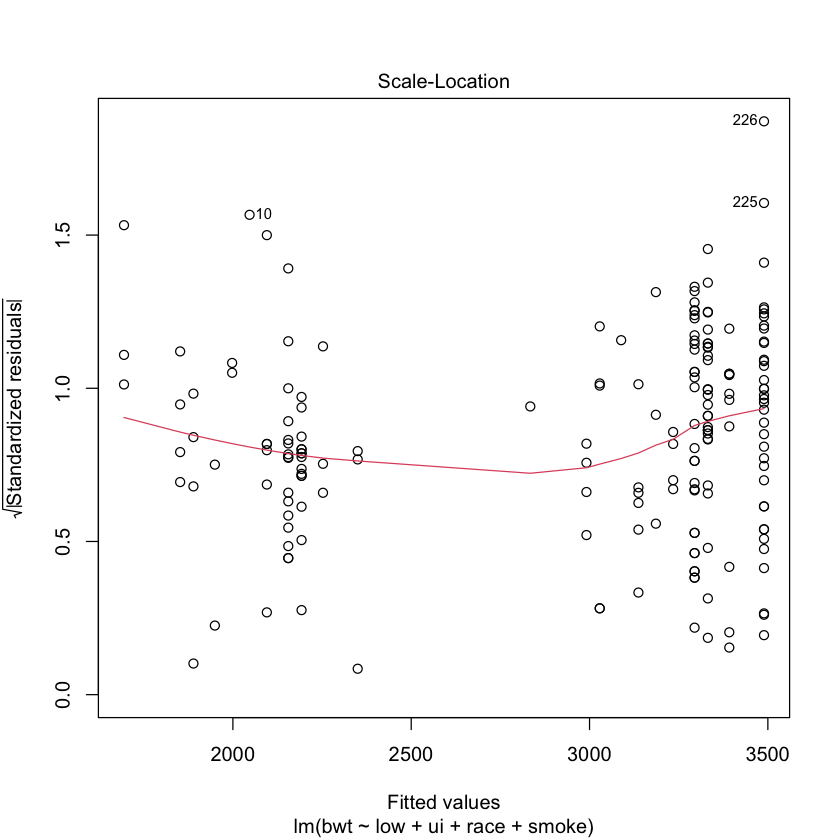

In [137]:
# Gráfico 3: Diagnosis para comprobar si la varianza de los residuos es constante
plot(mod_best, which=3)

**<u>Interpretación resultados</u>.-** La tercera gráfica es como la primera, pero usando una escala diferente, residuos estandarizados, y sirve para comprobar la homocedasticidad de la varianza de los residuos. Para que sea una evidencia positiva en esta gráfica se tiene que poder dibujar una línea en torno a la horizontal. En caso contrario, cómo ocurre con esta gráfica, sería una `evidencia NEGATIVA`. Es decir, la varianza de los residuos no serían homocedásticos sino heterocedásticos. 

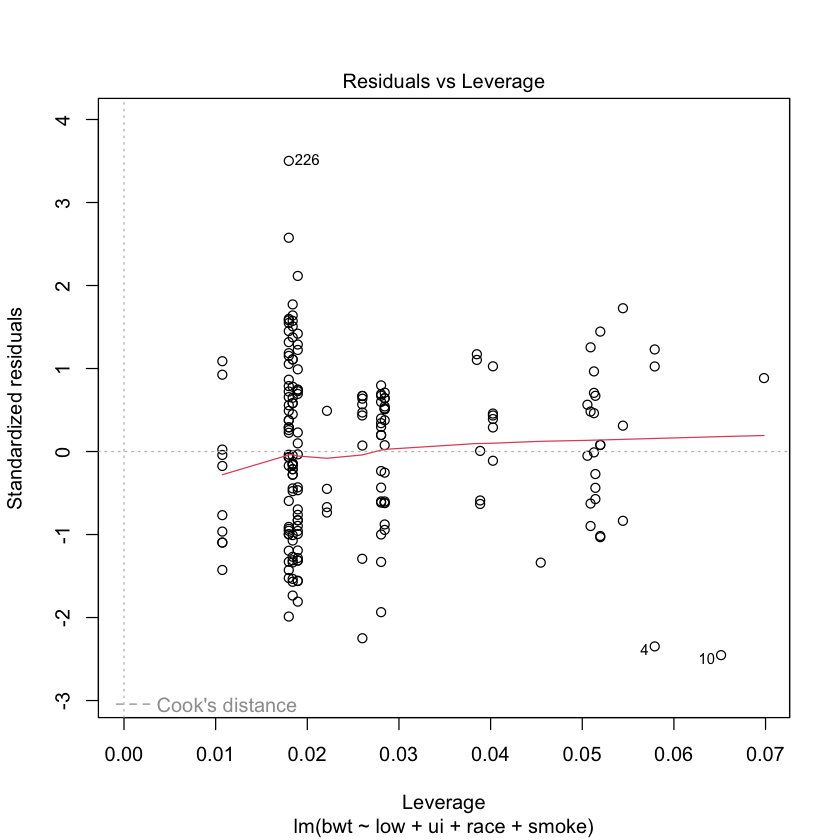

In [138]:
# Gráfico 4: Diagnosis para comprobar si existen observaciones anómalas
plot(mod_best, which=5)

**<u>Interpretación resultados</u>.-** La cuarta gráfica trata sobre la identificación de puntos influyentes, aberrantes y con efecto palanca del siguiente modo: 

* Las observaciones influyentes son aquellas con un impacto desproporcionado en la determinación de los parámetros del modelo. Se identifican usando la distancia de Cook. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de existir puntos con valores superiores a la línea de Cook.  


* Un punto aberrante es una observación que tiene un valor muy alto del residuo asociado. Para que sea una evidencia positiva en esta gráfica NO deben de exitir puntos con valores muy negativos y muy a la derecha. En este caso, podemos ver como existen varios puntos que incumplen dicha condición. Luego, sería una `evidencia NEGATIVA`. 


* Una observación con alto efecto palanca "leverage" es una observación que no es predicha satisfactoriamente por el modelo de regresión. Para que sea una `evidencia POSITIVA`, como ocurre en este caso, en esta gráfica NO deben de exitir puntos con valores muy positivos y muy a la derecha.

In [139]:
# Gráfico 5:
# Seleccionamos las 4 variables que nos interesan
xdata = wdata[, c("low", "ui", "race", "smoke")]

In [140]:
# Obtenemos la matriz de correlación con los coeficientes de correlación de Pearson
cor(xdata)

,low,ui,race,smoke
low,1.0000000,0.16904283,0.13779275,0.1614043
ui,0.1690428,1.00000000,0.05360209,0.0621590
race,0.1377928,0.05360209,1.00000000,-0.3390307
smoke,0.1614043,0.06215900,-0.33903074,1.0000000


**<u>Interpretación resultados</u>.-** La última matriz trata sobre la identificación del problema de multicolinealidad. Es decir, que exista relación entre las variables independientes. En caso afiramtivo, querría decir que dos o más variables, dependiendo de los resultados obtenidos, estarían aportando una capacidad explicativa común a nuestra variable dependiente. Luego, estaríamos redundando en la información. Por tanto, no sería un buen indicador. Por tanto, en este caso, vemos como en varios pares de variables el coeficiente de correlación es distinto de cero indicando la existencia de una relación entre las mismas. Luego, sería una `evidencia NEGATIVA`. Leer comentario al final de este ejercicio. Hay que hacer el contraste de correlación.

**<mark>Conclusión final diagnosis</marck>.-** En este ejercicio hemos obtenido tres evidencias positivas y cuatro evidencias negativas por lo que en función de los resultados obtenidos del proceso de diagnosis gráfico de los residuos podemos afirmar que el mejor modelo seleccionado no sería del todo BUENO para explicar el peso al nacer de los bebés en gramos considerados. Aunque, como os comento, hasta que no realicemos las pruebas contrastadas no podríamos saber si esas evidencias (tanto positivas como negativas) son ciertas.

**¡Nuevamente!** Os dejo a ustedes que confirméis con evidencias numéricas y contrastadas las hipótesis de normalidad y homocedasticidad de los residuos y la existencia de una relación lineal entre los valores ajustados y los residuos. Con respecto a los outliers con las evidencias gráficas y el estadístico de la distancia de Cook es necesario para confirmar que la cumple. También tendréis que aplicar el contraste de correlación, al menos, a un par de variables para verificar que existe un problema de multicolinealidad. Con que halléis a través de dicho contraste que existe relación entre un par de variables dependientes, de momento, será suficiente para afirmar que tenemos un problema de multicolinealidad.

<div style="background-color:#0BF7CC"><b> Nota.- Recordar la importancia de comentar e interpretar los resultados obtenidos. Seguir indicaciones realizadas en las sesiones teóricas. </b></div>

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>